<a href="https://colab.research.google.com/github/nikitban42/eda/blob/main/22BCE3885.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading the Dataset, Exploring Dimensions, Summary, and Data Handling


1.1 Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv'
df = pd.read_csv(url)

# View the column names
print(df.columns)

# View the first few rows of the dataset
df.head()

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068           0.0024        0.1700                   16.12   
1             3042           0.0005        0.1542                   16.60   
2             2600           0.0003        0.1020                   18.70   
3             2800           0.0002        0.1600                   16.65   
4             1939         0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M

1.2 Explore Dimensions and Summary

In [ ]:

print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

df.info()

df.describe()

The dataset contains 240 rows and 7 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    object 
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              237 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 13.3+ KB


Temperature (K)  Radius(R/Ro)  Absolute magnitude(Mv)   Star type
count       240.000000    240.000000              240.000000  240.000000
mean      10497.462500    237.157781                4.382396    2.500000
std        9552.425037    517.155763               10.532512    1.711394
min        1939.000000      0.008400              -11.920000    0.000000
25%        3344.250000      0.102750               -6.232500    1.000000
50%        5776.000000      0.762500                8.313000    2.500000
75%       15055.500000     42.750000               13.697500    4.000000
max       40000.000000   1948.500000               20.060000    5.000000

1.3 Data Handling: Check and fill missing values in numeric columns with median and non-numeric columns with mode.

In [ ]:

print(df.isnull().sum())


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


print(df.isnull().sum())

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                3
Spectral Class            0
dtype: int64
Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


<ipython-input-5-1b824c772848>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df['Star color'].fillna(df['Star color'].mode()[0], inplace=True)



Step 2: Data Cleaning and **Handling** **bold text**

2.1 Removing Duplicates

In [ ]:

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Shape after removing duplicates: (240, 7)


2.2 Outlier Detection and Filtering

<ipython-input-7-fc2ee89e836c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric_cols, palette='coolwarm')


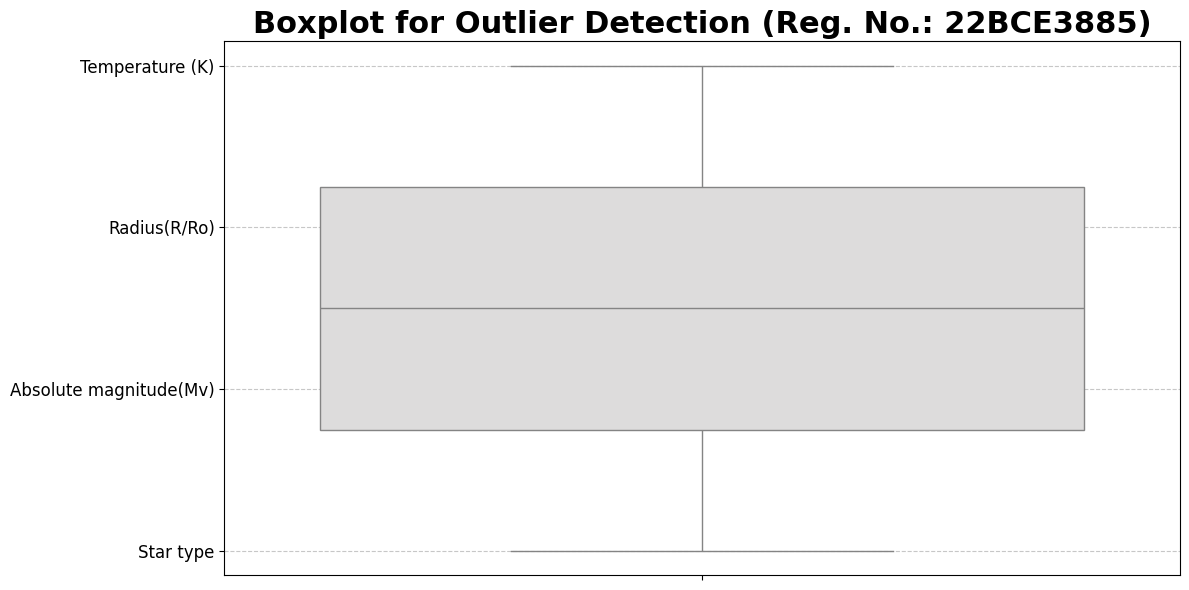

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols, palette='coolwarm')
plt.title('Boxplot for Outlier Detection (Reg. No.: 22BCE3885)', fontsize=22, weight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Step 3: Univariate Analysis**

3.1 Histogram

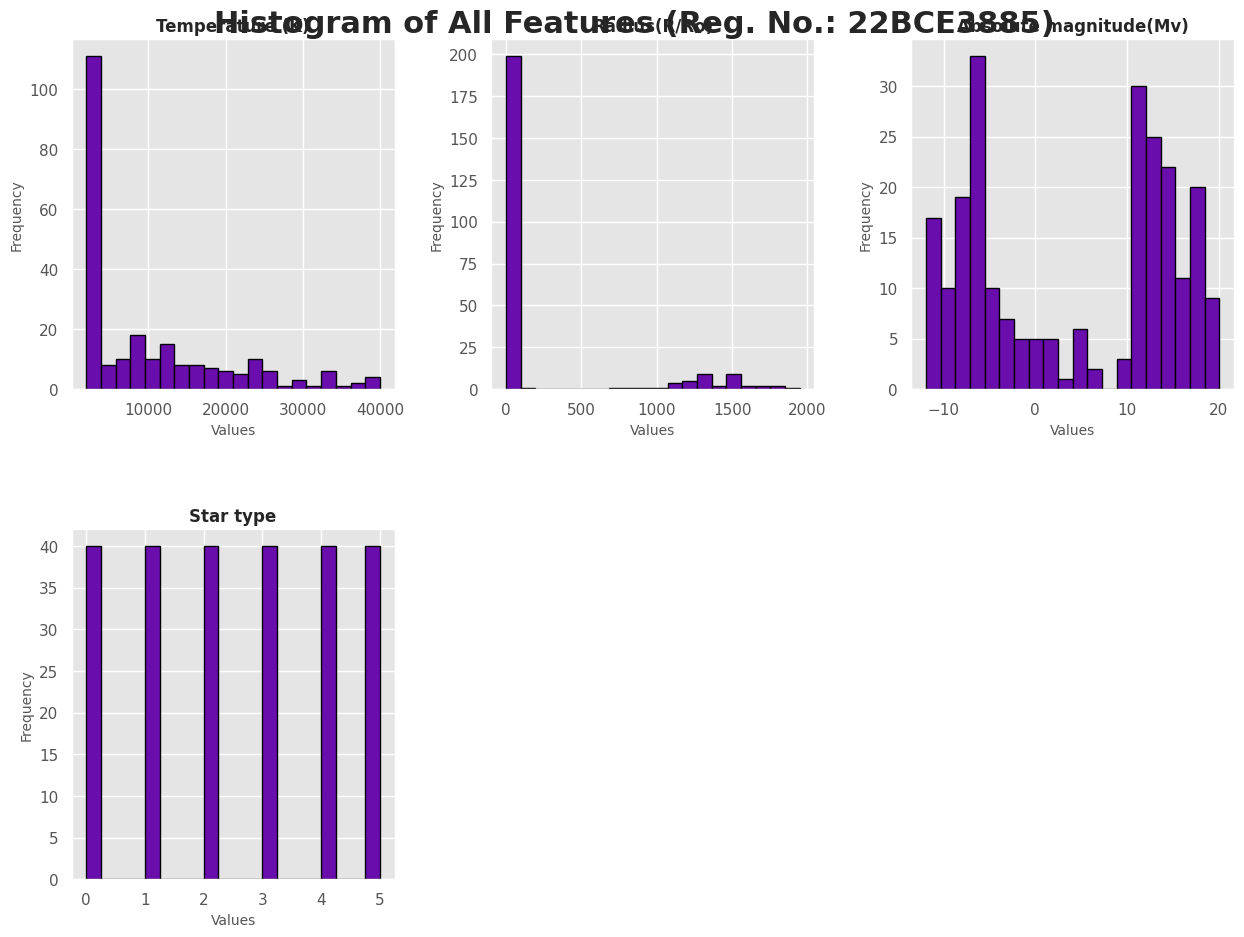

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns



sns.set(style="whitegrid")
plt.style.use('ggplot')

color = '#6a0dad'


df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate number of rows needed based on the number of features
num_features = len(df_numeric.columns)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot each feature's histogram
for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    df_numeric[column].plot(kind='hist', ax=ax, bins=20, color=color, edgecolor='black', linewidth=1.0)
    ax.set_title(column, fontsize=12, weight='bold')
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histogram of All Features (Reg. No.: 22BCE3885)', fontsize=22, weight='bold')
plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)
plt.show()



**3.2 Density Plot for area_mean**

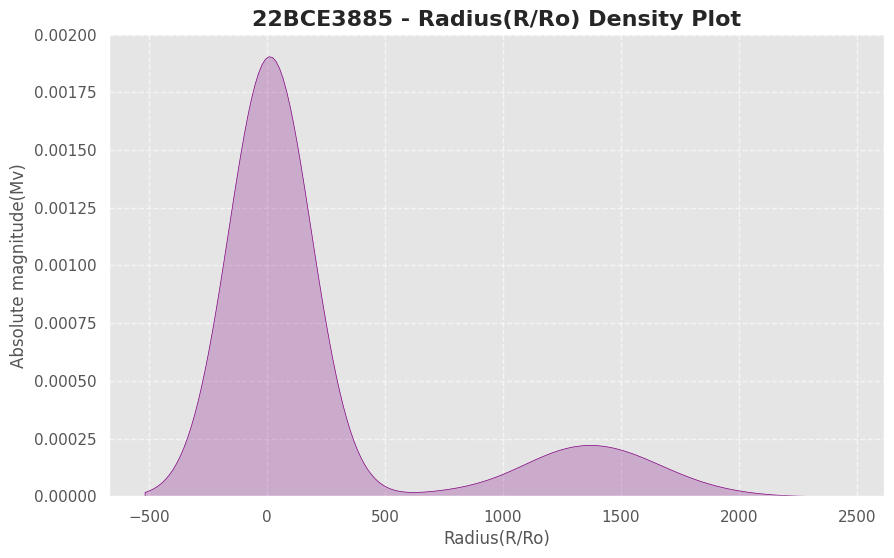

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Radius(R/Ro)'], color='purple', fill=True)
plt.title("22BCE3885 - Radius(R/Ro) Density Plot", fontsize=16, weight='bold')
plt.xlabel("Radius(R/Ro)", fontsize=12)
plt.ylabel("Absolute magnitude(Mv)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



3.3 Box Plot for area_mean

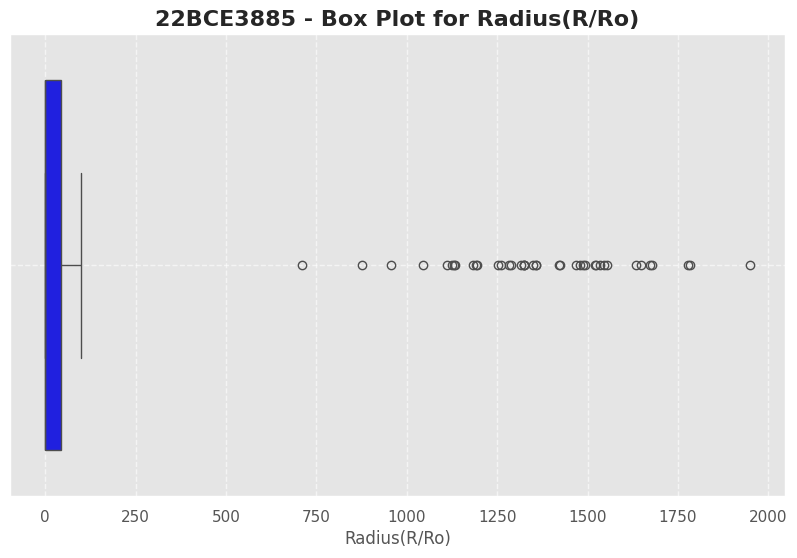

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Radius(R/Ro)'], color='blue')
plt.title("22BCE3885 - Box Plot for Radius(R/Ro)", fontsize=16, weight='bold')
plt.xlabel("Radius(R/Ro)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


3.4 Bar Plot for Diagnosis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")


plt.figure(figsize=(10, 6))

colors = sns.color_palette("Blues", n_colors=3)


sns.countplot(x='Star type', hue='Star type', data=df, palette=colors, width=0.4)


plt.title("22BCE3885 - Count of Star Types", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Star Type", fontsize=14, color='black', fontweight='bold')
plt.ylabel("Count", fontsize=14, color='black', fontweight='bold')
plt.xticks(fontsize=12, color='black', fontweight='bold')
plt.yticks(fontsize=12, color='black', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Star Type', loc='upper left', fontsize=10, bbox_to_anchor=(1, 1))


plt.show()


3.5 Pie Plot for Diagnosis

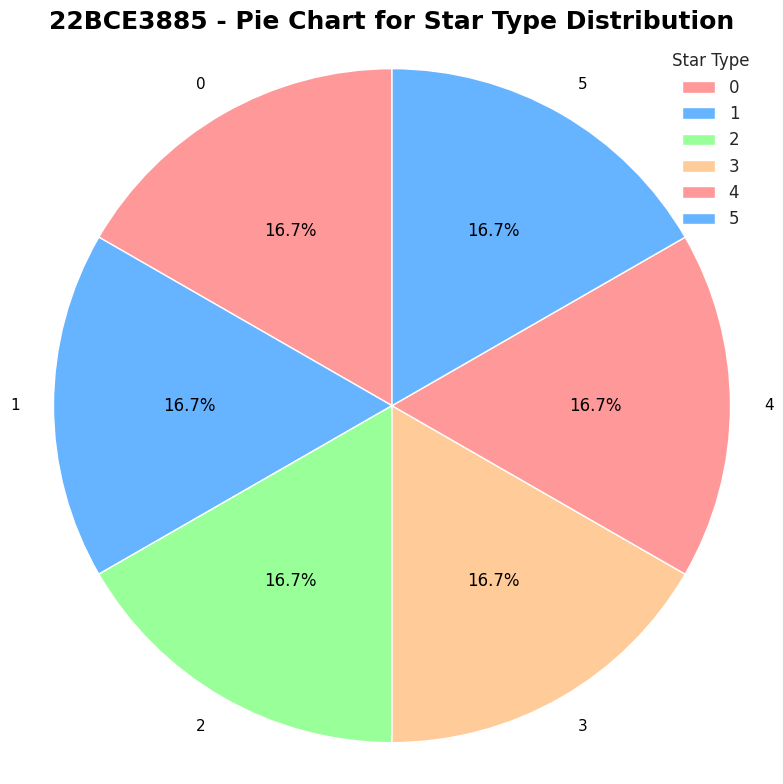

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each star type
star_type_counts = df['Star type'].value_counts()

# Create the figure with a balanced size
plt.figure(figsize=(8, 8))


colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create the pie chart with adjusted radius
wedges, texts, autotexts = plt.pie(
    star_type_counts,
    labels=star_type_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=False,
    radius=0.8
)

# Set the title with appropriate font size and style
plt.title("22BCE3885 - Pie Chart for Star Type Distribution", fontsize=18, fontweight='bold', color='black')
plt.axis('equal')


for text in texts:
    text.set_color('black')
for text in autotexts:
    text.set_color('black')


plt.legend(wedges, star_type_counts.index, title="Star Type", loc="upper right", fontsize=12, frameon=False)

plt.tight_layout()


plt.show()


3.6 Dotplot

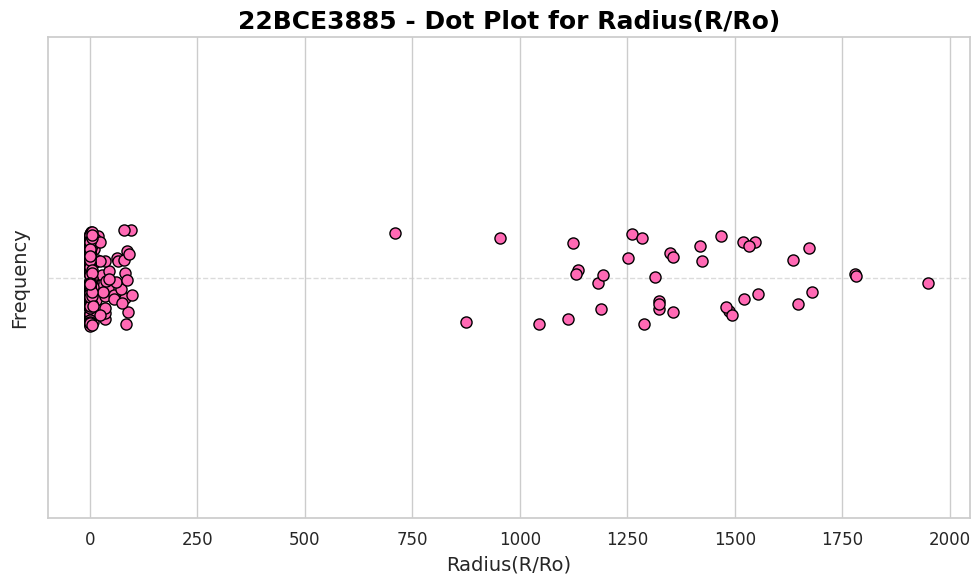

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Dot plot for 'Radius(R/Ro)'
sns.stripplot(x='Radius(R/Ro)', data=df, color='#FF69B4', size=8, jitter=True, edgecolor='black', linewidth=1)

plt.title("22BCE3885 - Dot Plot for Radius(R/Ro)", fontsize=18, fontweight='bold', color='black')
plt.xlabel("Radius(R/Ro)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



3.7 Boxplot

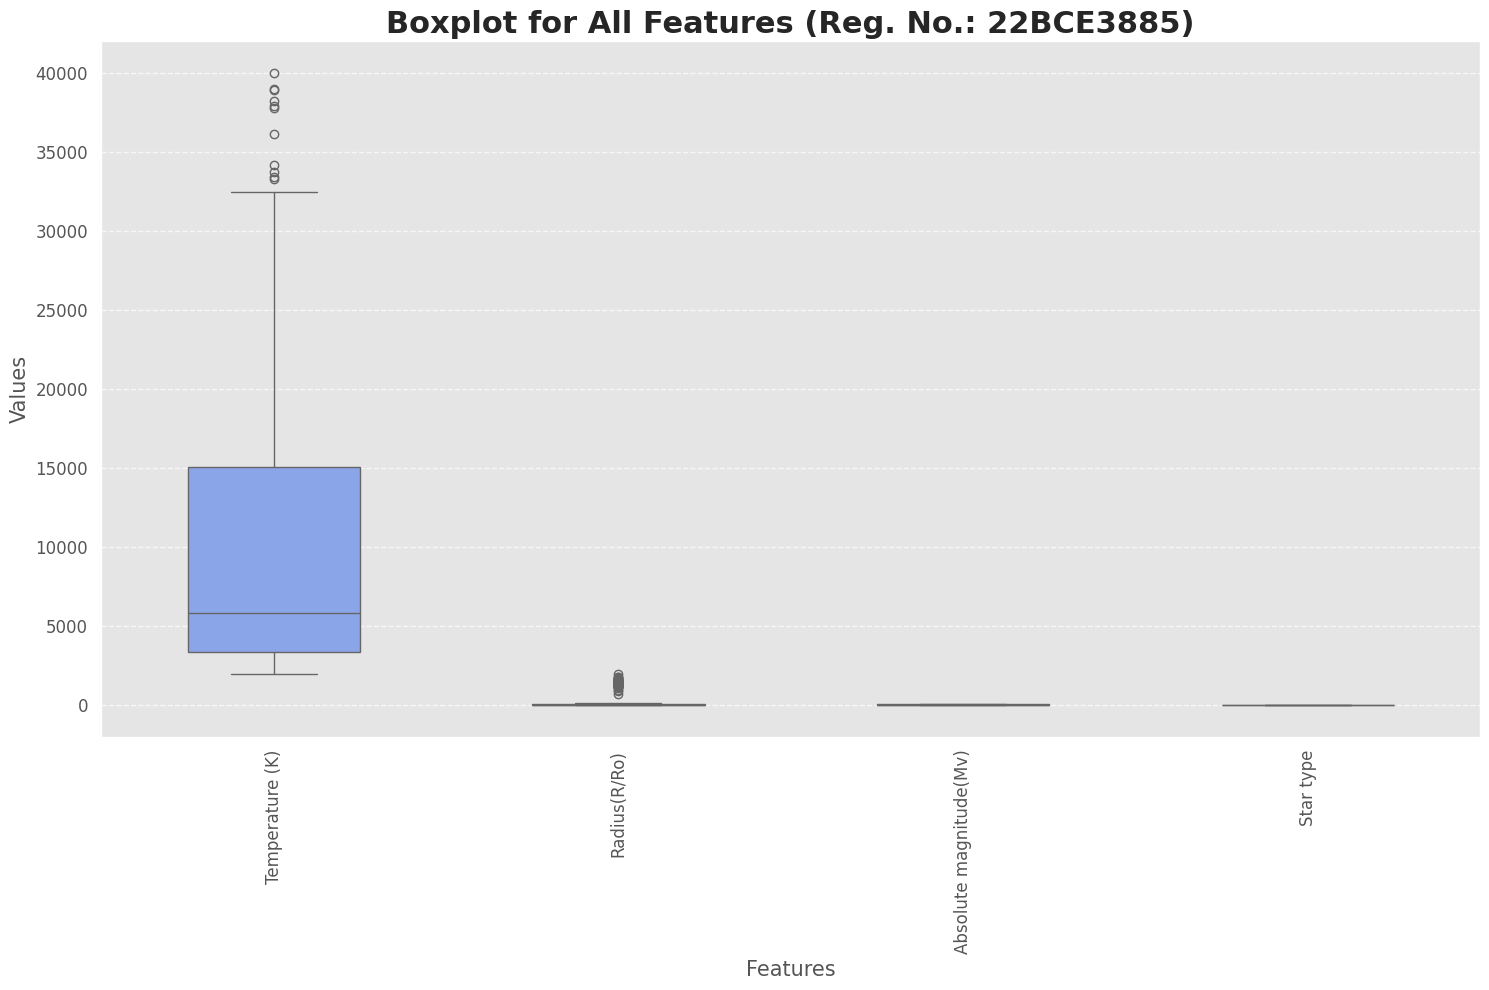

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and palette
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Define a color palette with diverse colors for clarity
palette = sns.color_palette("coolwarm", n_colors=len(df_numeric.columns))

# Create the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numeric, palette=palette, width=0.5)

plt.title('Boxplot for All Features (Reg. No.: 22BCE3885)', fontsize=22, weight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Star type' column to numerical values
df['Star type'] = df['Star type'].astype('category').cat.codes




# Step 4: Bivariate Analysis

**4.1 Create a Contingency Table**

we can analyze diagnosis vs. smoothness_mean (you can choose other categorical features as needed):

In [ ]:


# Define bins and labels for 'Radius(R/Ro)'
bins = [0, 0.5, 1.0, 1.5, 2.0]  # Adjust the bin ranges based on your data
labels = ['Low', 'Medium', 'High', 'Very High']

# Binning 'Radius(R/Ro)' into categories
df['radius_category'] = pd.cut(df['Radius(R/Ro)'], bins=bins, labels=labels, include_lowest=True)

# Create a contingency table between 'Star type' and 'radius_category'
contingency_table = pd.crosstab(df['Star type'], df['radius_category'])
print(contingency_table)


radius_category  Low  Medium  High  Very High
Star type                                    
0                 40       0     0          0
1                 34       6     0          0
2                 40       0     0          0
3                  0       7     4          3


**4.2 Categorical vs. Categorical Analysis**

4.2.1 Stacked Bar Chart

<Figure size 1000x600 with 0 Axes>

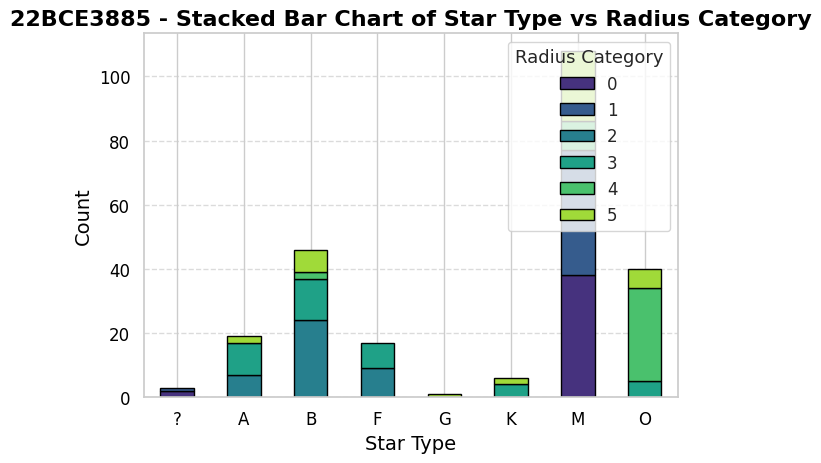

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Define a more diverse color palette
colors = sns.color_palette("viridis", n_colors=len(contingency_table.columns))

# Create the stacked bar chart with reduced width
contingency_table.plot(
    kind='bar',
    stacked=True,
    color=colors,
    edgecolor='black',
    width=0.5
)

# Set the title and labels with enhanced font size and style
plt.title("22BCE3885 - Stacked Bar Chart of Star Type vs Radius Category", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Star Type", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')
plt.xticks(rotation=0, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Radius Category', title_fontsize='13', fontsize='12', loc='upper right', frameon=True, shadow=False)
plt.tight_layout()


plt.show()


4.2.2 Stacked Bar Plot with Seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a fresh color palette (using cool blues & greens)
sns.set_palette(['#4682B4', '#32CD32'])

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='radius_category', hue='Star type', data=df, dodge=False)

plt.title("22BCE3885 - Stacked Bar Plot of Star Type vs Radius Category", fontsize=16, fontweight='bold')
plt.xlabel("Radius Category", fontsize=14)
plt.ylabel("Count", fontsize=14)


plt.legend(title='Star Type')

# Show plot
plt.show()



4.2.3 Grouped Bar Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))


custom_palette = sns.color_palette("tab10", n_colors=6)


sns.countplot(data=df, x='radius_category', hue='Star type', palette=custom_palette, edgecolor='black')


plt.title("22BCE3885 - Grouped Bar Chart of Star Type vs Radius Category", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Radius Category", fontsize=14, color='black')
plt.ylabel("Count", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Star Type', title_fontsize='13', fontsize='12', loc='upper right', frameon=True)
plt.tight_layout()


plt.show()


# New Section4.3 Categorical vs. Quantitative Analysis

4.3.1 Bar Chart

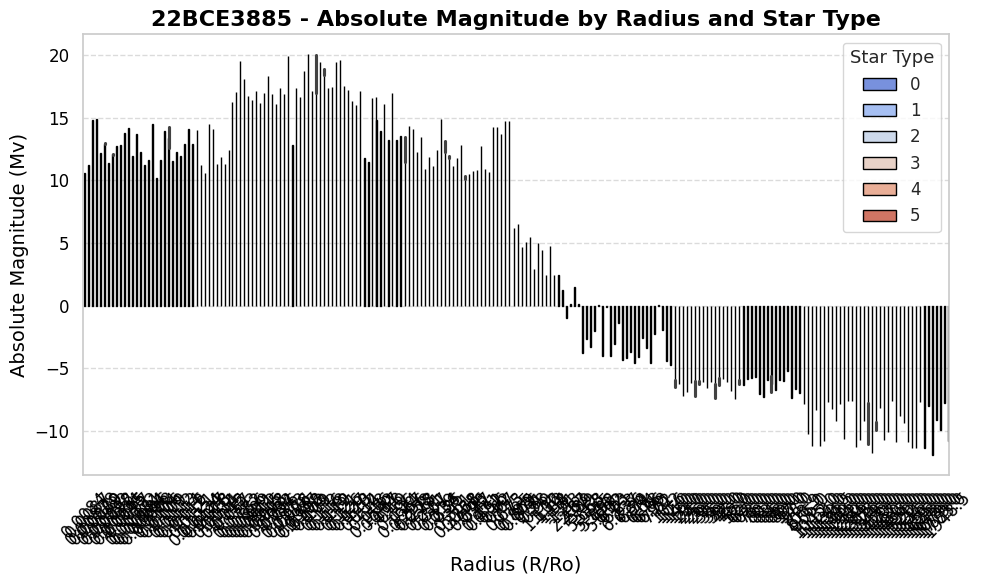

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Create a bar plot with an appropriate color palette
sns.barplot(data=df, x='Radius(R/Ro)', y='Absolute magnitude(Mv)', hue='Star type',
            palette=sns.color_palette("coolwarm", n_colors=6), edgecolor='black')

# Set the title and labels with enhanced font size and style
plt.title("22BCE3885 - Absolute Magnitude by Radius and Star Type", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Radius (R/Ro)", fontsize=14, color='black')
plt.ylabel("Absolute Magnitude (Mv)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black', rotation=45)
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Star Type', title_fontsize='13', fontsize='12', loc='upper right', frameon=True)
plt.tight_layout()


plt.show()


4.3.2 Density Plot

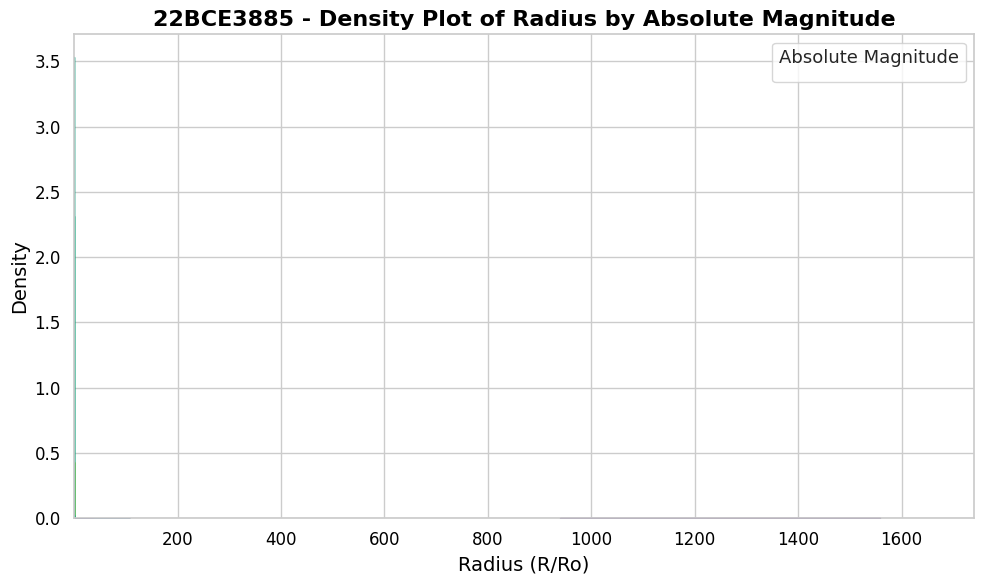

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Create a figure with an appropriate size
plt.figure(figsize=(10, 6))

# Use the 'viridis' palette to ensure good color differentiation
palette = sns.color_palette("viridis", n_colors=len(df['Absolute magnitude(Mv)'].unique()))

# Using KDE plot with filled areas, specify hue directly
kde_plot = sns.kdeplot(
    data=df,
    x='Radius(R/Ro)',
    hue='Absolute magnitude(Mv)',
    fill=True,
    palette=palette,
    alpha=0.5,
    warn_singular=False
)


plt.xlim(df['Radius(R/Ro)'].quantile(0.01), df['Radius(R/Ro)'].quantile(0.99))


plt.title("22BCE3885 - Density Plot of Radius by Absolute Magnitude", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Radius (R/Ro)", fontsize=14, color='black')
plt.ylabel("Density", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Legend for Absolute Magnitude categories
handles, labels = kde_plot.get_legend_handles_labels()
plt.legend(handles, labels, title='Absolute Magnitude', title_fontsize='13', fontsize='12', loc='upper right', frameon=True)


plt.tight_layout()

# Show the plot
plt.show()



4.3.3 Box Plot

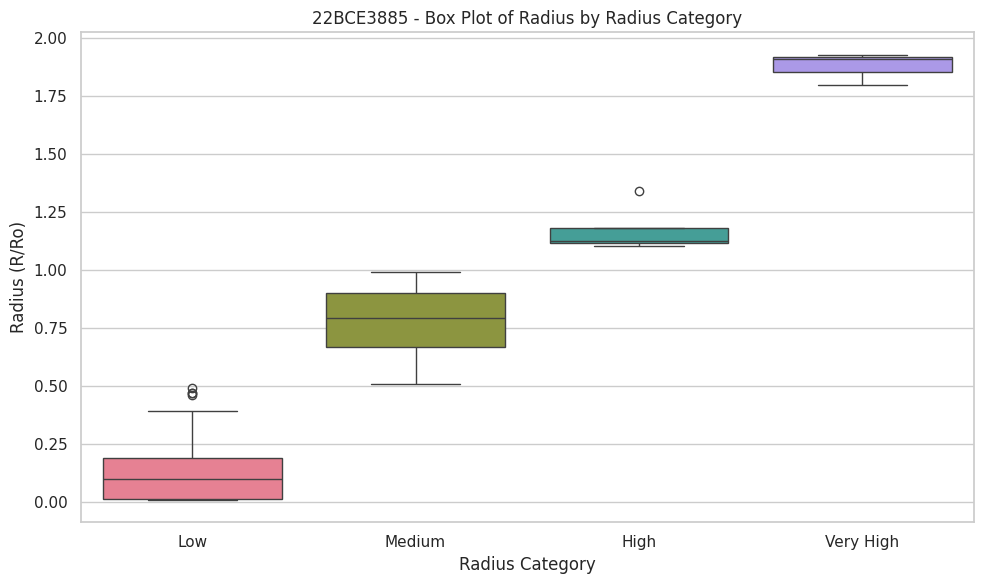

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Get the number of unique categories and generate a matching color palette
unique_categories = df['radius_category'].nunique()
palette = sns.color_palette("husl", n_colors=unique_categories)

# Create the box plot with hue assigned
sns.boxplot(data=df, x='radius_category', y='Radius(R/Ro)', hue='radius_category', palette=palette, legend=False)

# Set titles and labels
plt.title("22BCE3885 - Box Plot of Radius by Radius Category")
plt.xlabel("Radius Category")
plt.ylabel("Radius (R/Ro)")
plt.tight_layout()


plt.show()


4.3.4 Violin Plot

<ipython-input-38-0ba3e6bb05a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='radius_category', y='Temperature (K)', palette=palette, edgecolor='black')


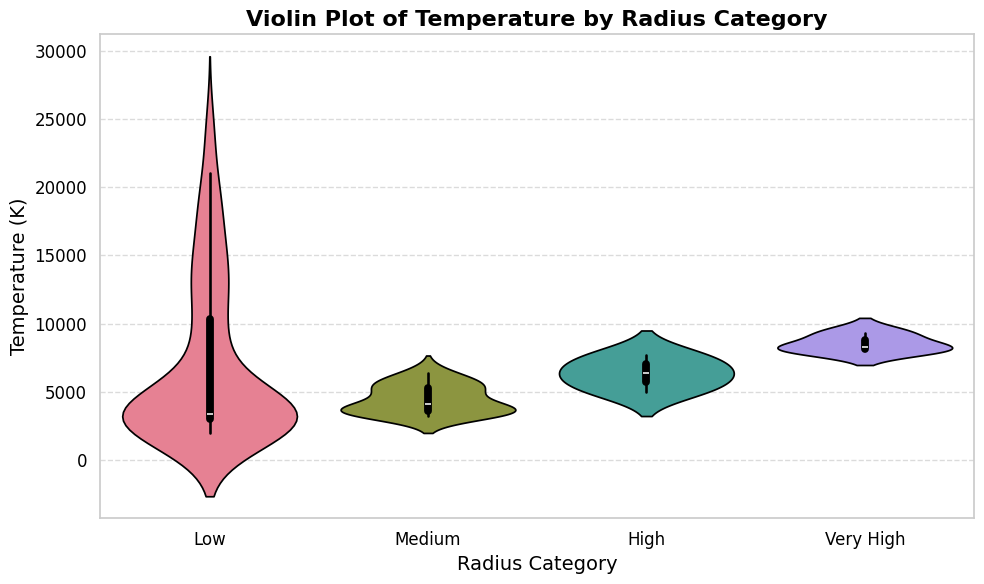

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))

# Use a diverse color palette
palette = sns.color_palette("husl", n_colors=df['radius_category'].nunique())

# Create the violin plot
sns.violinplot(data=df, x='radius_category', y='Temperature (K)', palette=palette, edgecolor='black')


plt.title("Violin Plot of Temperature by Radius Category", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Radius Category", fontsize=14, color='black')
plt.ylabel("Temperature (K)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


4.3.5 Combined Violin and Box Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a categorical variable for Absolute Magnitude
bins = [-10, 0, 5, 10, df['Absolute magnitude(Mv)'].max()]
labels = ['Very Bright', 'Bright', 'Moderate', 'Dim']
df['magnitude_category'] = pd.cut(df['Absolute magnitude(Mv)'], bins=bins, labels=labels, include_lowest=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Define new color palette
violin_colors = ["#008080", "#20B2AA", "#5F9EA0", "#4682B4"]
box_color = "#D3D3D3"

# Create the violin plot with the new colors
sns.violinplot(data=df, x='magnitude_category', y='Radius(R/Ro)',
               palette=violin_colors, inner=None)

# Create the box plot on top with a new color
sns.boxplot(data=df, x='magnitude_category', y='Radius(R/Ro)',
            color=box_color, fliersize=0)

# Add title and labels
plt.title("22BCE3885 - Combined Violin and Box Plot of Radius by Magnitude Category", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Magnitude Category", fontsize=14, color='black')
plt.ylabel("Radius (R/Ro)", fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


<ipython-input-41-da592e8a8d6e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='magnitude_category', y='Radius(R/Ro)',



# 4.4 Quantitative vs. Quantitative Analysis

4.4.1 Line Plot

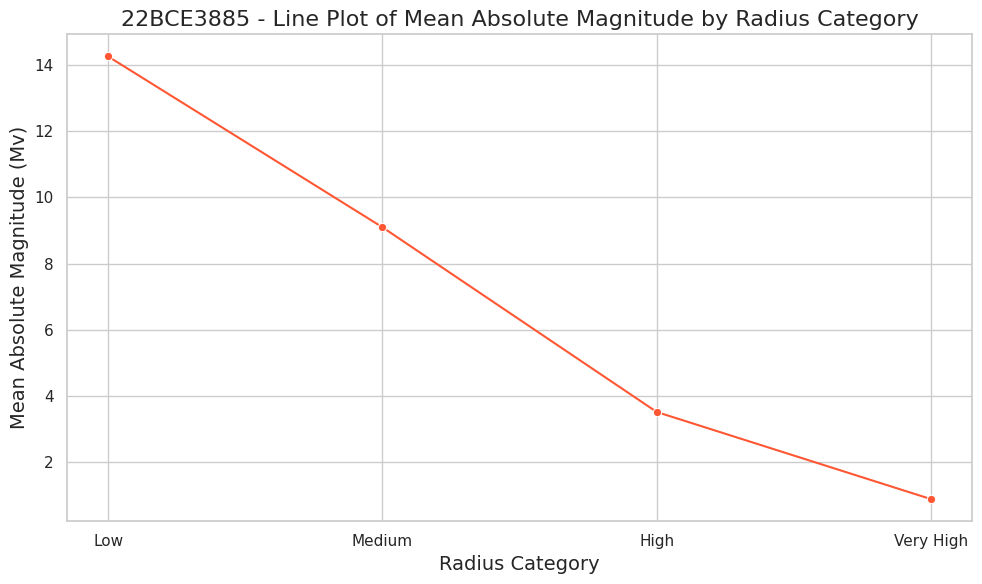

In [ ]:
# Line plot (using mean values for visualization)
mean_values = df.groupby('radius_category', observed=False)['Absolute magnitude(Mv)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_values, x='radius_category', y='Absolute magnitude(Mv)', marker='o', color='#FF5733')

plt.title("22BCE3885 - Line Plot of Mean Absolute Magnitude by Radius Category", fontsize=16)
plt.xlabel("Radius Category", fontsize=14)
plt.ylabel("Mean Absolute Magnitude (Mv)", fontsize=14)

plt.tight_layout()
plt.show()



4.4.2 Correlation Heatmap

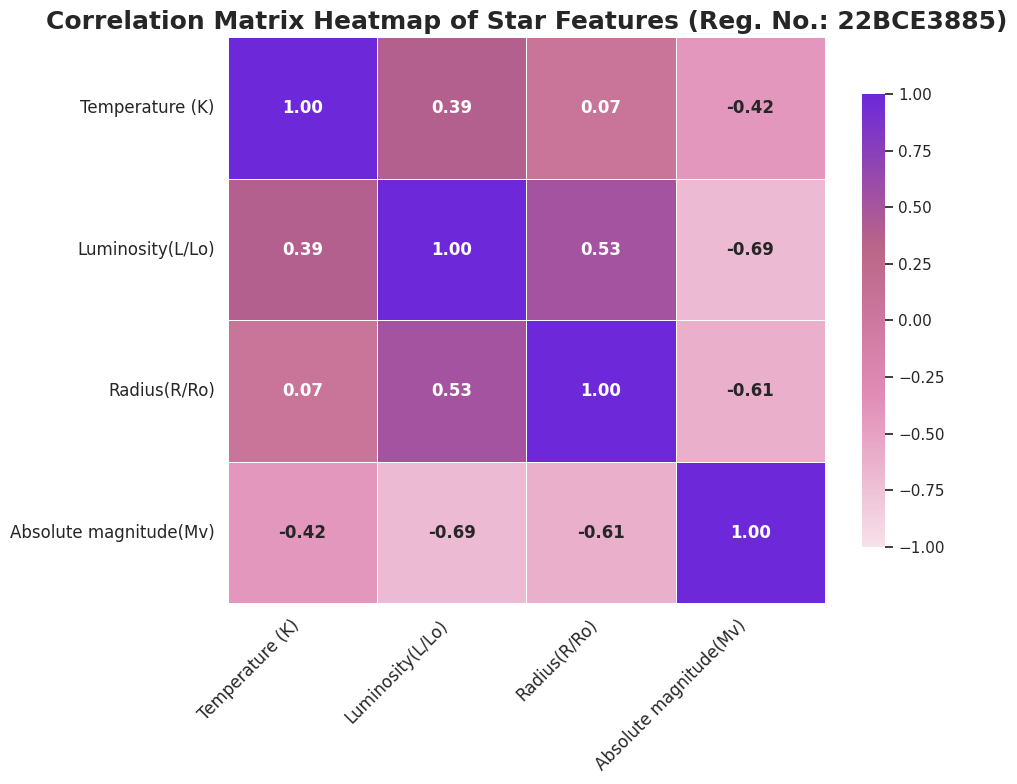

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np


colors = ["#f7e1ea", "#e08cb5", "#b96588", "#6D28D9"]
cmap = LinearSegmentedColormap.from_list("purple_pink", colors, N=256)


columns_of_interest = [
    'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
    'Absolute magnitude(Mv)'
]
df_relevant = df[columns_of_interest].replace('?', np.nan)
df_relevant = df_relevant.apply(pd.to_numeric, errors='coerce').dropna()

# Compute the correlation matrix
corr = df_relevant.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap=cmap,
    fmt='.2f',
    linewidths=0.5,
    vmin=-1, vmax=1,
    center=0,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 12, "weight": 'bold'}
)


plt.title('Correlation Matrix Heatmap of Star Features (Reg. No.: 22BCE3885)', fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


4.4.3 Scatter Plot

<ipython-input-47-d3ab3df06f8e>:9: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


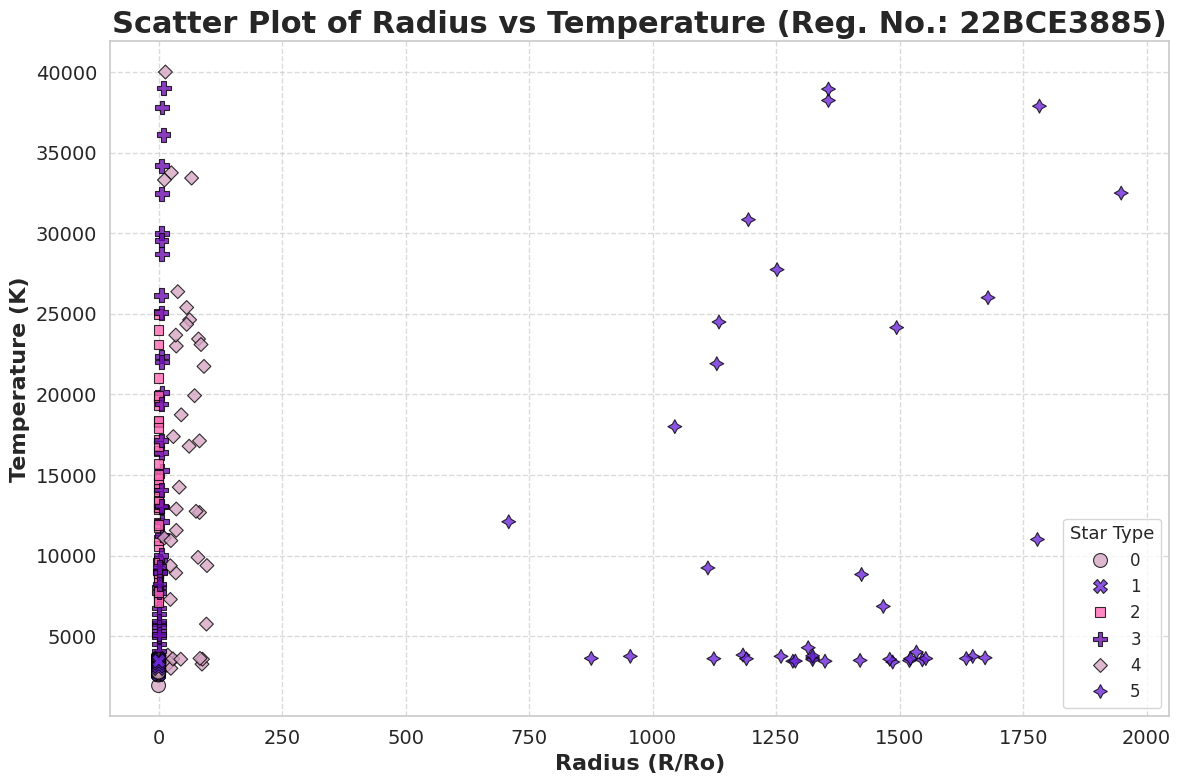

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


palette = sns.color_palette(["#D5A6C4", "#6D28D9", "#FF69B4", "#6A0DAD"])

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Radius(R/Ro)',
    y='Temperature (K)',
    hue='Star type',
    data=df,
    palette=palette,
    style='Star type',
    s=100,
    edgecolor='black',
    alpha=0.8
)

plt.title('Scatter Plot of Radius vs Temperature (Reg. No.: 22BCE3885)', fontsize=22, weight='bold')
plt.xlabel('Radius (R/Ro)', fontsize=16, weight='bold')
plt.ylabel('Temperature (K)', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)


plt.legend(title='Star Type', title_fontsize='13', fontsize='12', loc='best')

# Show the plot
plt.tight_layout()
plt.show()


# Step 5: Multivariate Analysis


5.1 Scatter Plot with Color as a Third Variable

<ipython-input-48-c8d7c4cbc1e2>:9: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


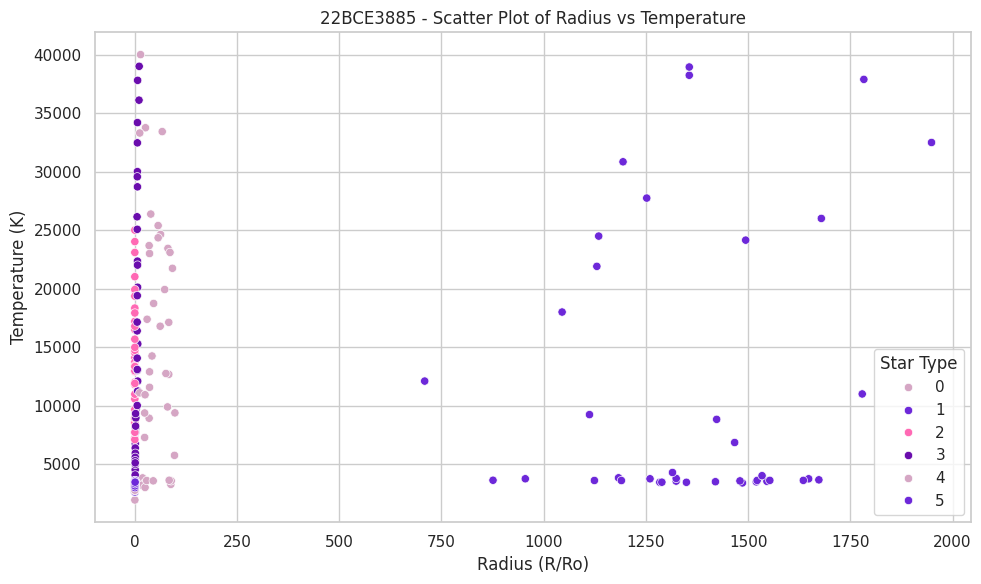

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
palette = ["#D5A6C4", "#6D28D9", "#FF69B4", "#6A0DAD"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Radius(R/Ro)',
    y='Temperature (K)',
    hue='Star type',
    palette=palette
)

# Customize the plot
plt.title("22BCE3885 - Scatter Plot of Radius vs Temperature")
plt.xlabel("Radius (R/Ro)")
plt.ylabel("Temperature (K)")
plt.legend(title='Star Type')
plt.tight_layout()

# Show the plot
plt.show()


5.2 Scatter Plot with Color and Shape as Variables

<ipython-input-49-022b73bf0e6e>:9: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


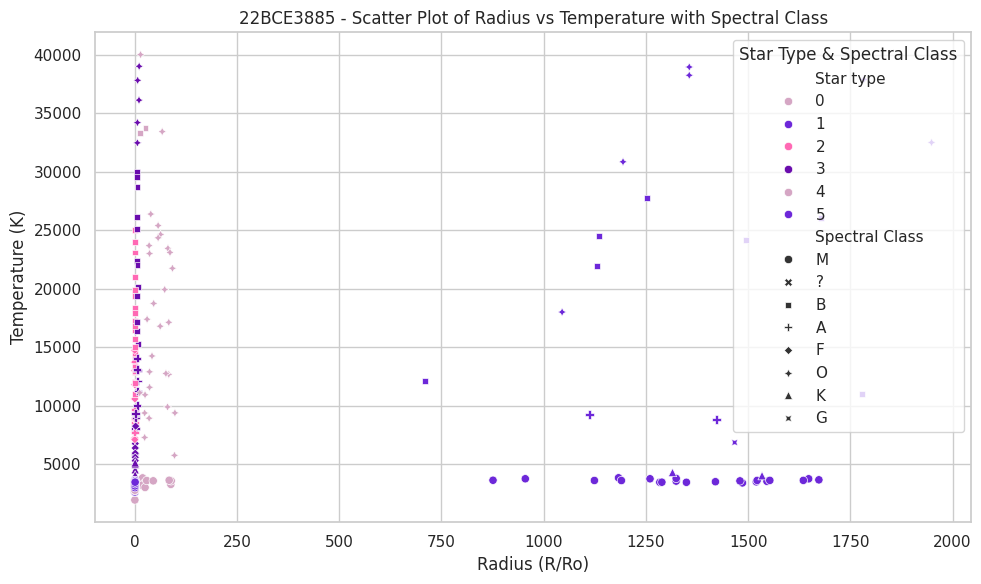

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


palette = ["#D5A6C4", "#6D28D9", "#FF69B4", "#6A0DAD", "#FFA500", "#008080"]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Radius(R/Ro)',
    y='Temperature (K)',
    hue='Star type',
    style='Spectral Class',
    palette=palette
)


plt.title("22BCE3885 - Scatter Plot of Radius vs Temperature with Spectral Class")
plt.xlabel("Radius (R/Ro)")
plt.ylabel("Temperature (K)")
plt.legend(title='Star Type & Spectral Class')
plt.tight_layout()

# Show the plot
plt.show()


5.3 Scatter Plot with Color and Size as Variables

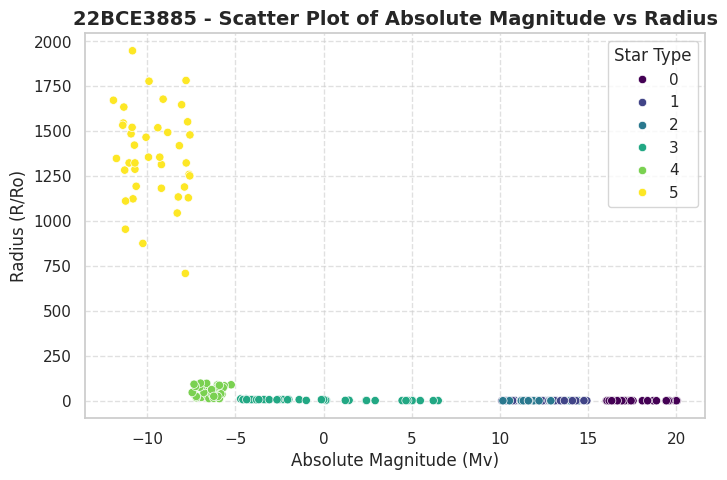

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Create a simplified scatter plot with relevant columns
sns.scatterplot(
    data=df,
    x='Absolute magnitude(Mv)',
    y='Radius(R/Ro)',
    hue='Star type',
    palette="viridis"
)


plt.title("22BCE3885 - Scatter Plot of Absolute Magnitude vs Radius", fontsize=14, fontweight='bold')
plt.xlabel("Absolute Magnitude (Mv)", fontsize=12)
plt.ylabel("Radius (R/Ro)", fontsize=12)
plt.legend(title='Star Type')
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()



5.4 Bubble Plot

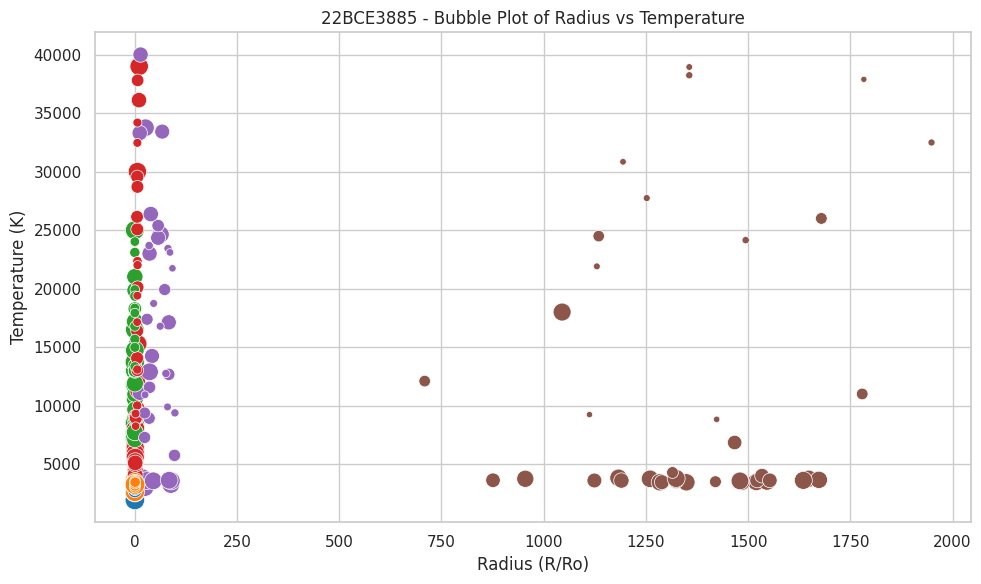

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Radius(R/Ro)',
    y='Temperature (K)',
    hue='Star type',
    size='Luminosity(L/Lo)',
    sizes=(20, 200),
    palette=sns.color_palette("tab10", n_colors=df['Star type'].nunique()),
    legend=False
)

plt.title("22BCE3885 - Bubble Plot of Radius vs Temperature")
plt.xlabel("Radius (R/Ro)")
plt.ylabel("Temperature (K)")
plt.tight_layout()
plt.show()


5.5 Faceted Histogram

In [ ]:
g = sns.FacetGrid(df, col='Star type', height=5, aspect=1)
g.map(sns.histplot, 'Radius(R/Ro)', bins=30, color='#6D28D9', alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("22BCE3885 - Histogram of Radius by Star Type")
plt.show()


5.6 Pairplot

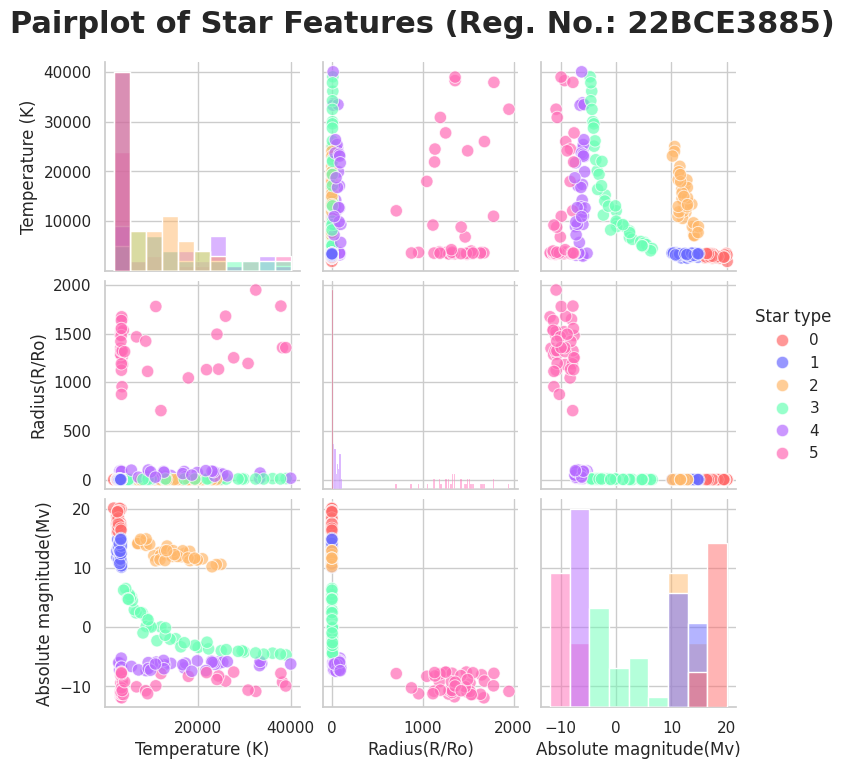

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom palette with more distinct colors
palette = sns.color_palette(["#FF6B6B", "#6B6BFF", "#FFB86B", "#6BFFB6", "#B66BFF", "#FF6BB6"])


features_of_interest = [
    'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'
]
df_relevant = df[features_of_interest + ['Star type']]

# Create the pairplot
pairplot = sns.pairplot(
    df_relevant,
    hue='Star type',
    palette=palette,
    diag_kind='hist',
    plot_kws={'alpha': 0.7, 'edgecolor': 'w', 's': 80},
)

pairplot.fig.suptitle('Pairplot of Star Features (Reg. No.: 22BCE3885)', fontsize=22, weight='bold', y=1.02)
pairplot.fig.subplots_adjust(top=0.95)

# Show the plot
plt.show()


# Module 2

6.1 Merging Data

In [ ]:
# Example: Creating a secondary dataframe to merge (based on 'Star type')
df_merge = df[['Temperature (K)', 'Star type']]
df_merged = pd.merge(df, df_merge, on='Temperature (K)')


df_merged.head()


Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068           0.0024        0.1700                   16.12   
1             3042           0.0005        0.1542                   16.60   
2             2600           0.0003        0.1020                   18.70   
3             2600           0.0003        0.1020                   18.70   
4             2800           0.0002        0.1600                   16.65   

   Star type_x Star color Spectral Class radius_category magnitude_category  \
0            0        Red              M             Low                Dim   
1            0        Red              M             Low                Dim   
2            0        Red              M             Low                Dim   
3            0        Red              M             Low                Dim   
4            0        Red              M             Low                Dim   

   Star type_y  
0            0  
1            0  
2            0  
3            0  
4            0


6.2 Reshaping with Hierarchical Indexing

In [ ]:
# Setting a hierarchical index based on 'Star type' and 'Radius(R/Ro)'
df.set_index(['Star type', 'Radius(R/Ro)'], inplace=True)
df.head()

# Resetting the index back
df.reset_index(inplace=True)
df.head()


Star type  Radius(R/Ro)  Temperature (K) Luminosity(L/Lo)  \
0          0        0.1700             3068           0.0024   
1          0        0.1542             3042           0.0005   
2          0        0.1020             2600           0.0003   
3          0        0.1600             2800           0.0002   
4          0        0.1030             1939         0.000138   

   Absolute magnitude(Mv) Star color Spectral Class radius_category  \
0                   16.12        Red              M             Low   
1                   16.60        Red              M             Low   
2                   18.70        Red              M             Low   
3                   16.65        Red              M             Low   
4                   20.06        Red              M             Low   

  magnitude_category  
0                Dim  
1                Dim  
2                Dim  
3                Dim  
4                Dim

6.3 Transformation Techniques

In [ ]:
# Applying log transformation to reduce skewness
df['log_Radius'] = np.log(df['Radius(R/Ro)'] + 1)

# View transformed column
print(df[['Radius(R/Ro)', 'log_Radius']].head())


   Radius(R/Ro)  log_Radius
0        0.1700    0.157004
1        0.1542    0.143407
2        0.1020    0.097127
3        0.1600    0.148420
4        0.1030    0.098034


6.4 Discretization and Binning

In [ ]:
# Discretizing the 'Radius(R/Ro)' column into bins
bins = [0, 10, 100, 1000]
labels = ['Small', 'Medium', 'Large']
df['radius_bin'] = pd.cut(df['Radius(R/Ro)'], bins=bins, labels=labels)

# View the binned column
df[['Radius(R/Ro)', 'radius_bin']].head()


Radius(R/Ro) radius_bin
0        0.1700      Small
1        0.1542      Small
2        0.1020      Small
3        0.1600      Small
4        0.1030      Small


# Module 3

7.1 Time-Series Analysis

7.2 Create a Simulated Time Index

Assuming each row is a time point, create an index.

In [ ]:
# Simulate a time index
df['time'] = pd.Series(range(len(df)))

# View the updated dataframe
df.head()


Star type  Radius(R/Ro)  Temperature (K) Luminosity(L/Lo)  \
0          0        0.1700             3068           0.0024   
1          0        0.1542             3042           0.0005   
2          0        0.1020             2600           0.0003   
3          0        0.1600             2800           0.0002   
4          0        0.1030             1939         0.000138   

   Absolute magnitude(Mv) Star color Spectral Class radius_category  \
0                   16.12        Red              M             Low   
1                   16.60        Red              M             Low   
2                   18.70        Red              M             Low   
3                   16.65        Red              M             Low   
4                   20.06        Red              M             Low   

  magnitude_category  log_Radius radius_bin  time  
0                Dim    0.157004      Small     0  
1                Dim    0.143407      Small     1  
2                Dim    0.097127      Small     2  
3                Dim    0.148420      Small     3  
4                Dim    0.098034      Small     4

**7.3 Check for Missing Values**

Check for any missing values in the dataset.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Star type                   0
Radius(R/Ro)                0
Temperature (K)             0
Luminosity(L/Lo)            0
Absolute magnitude(Mv)      0
Star color                  0
Spectral Class              0
radius_category           106
magnitude_category         19
log_Radius                  0
radius_bin                 37
time                        0
dtype: int64


7.4 Plot the Time Series

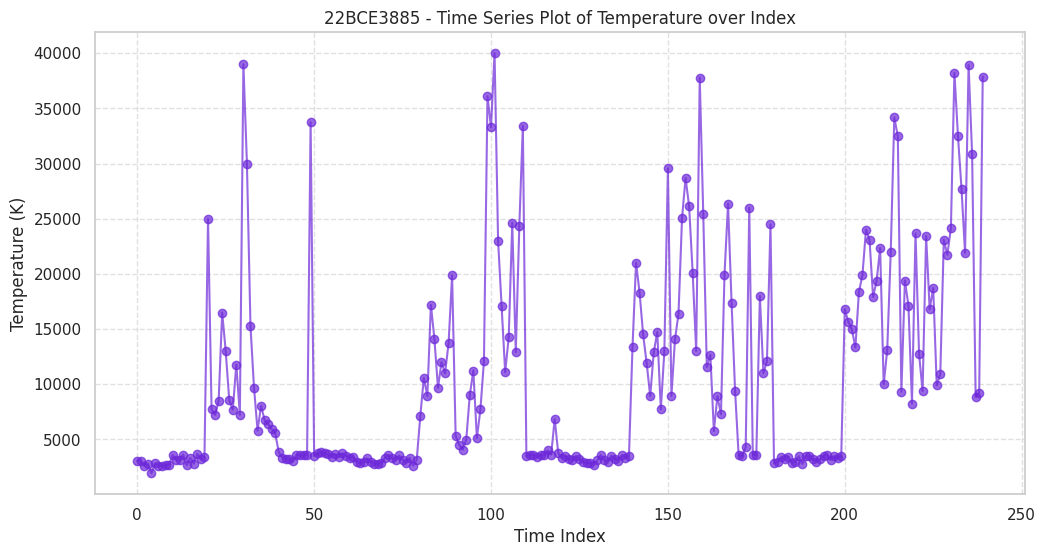

In [ ]:
import matplotlib.pyplot as plt

# Simulate a time index (assuming 'Temperature (K)' varies over time)
df['time'] = pd.Series(range(len(df)))

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Temperature (K)'], marker='o', linestyle='-', color='#6D28D9', alpha=0.7)
plt.title("22BCE3885 - Time Series Plot of Temperature over Index")
plt.xlabel("Time Index")
plt.ylabel("Temperature (K)")
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


7.5 Decompose the Dataset

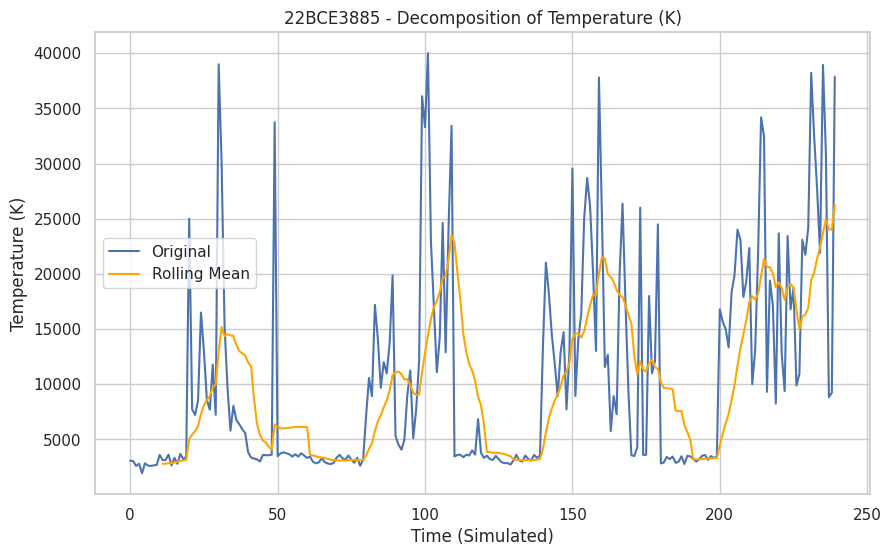

In [ ]:
# Calculate rolling mean for 'Temperature (K)'
df['rolling_mean'] = df['Temperature (K)'].rolling(window=12).mean()

# Plot original and rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['Temperature (K)'], label='Original')
plt.plot(df['time'], df['rolling_mean'], label='Rolling Mean', color='orange')
plt.title("22BCE3885 - Decomposition of Temperature (K)")
plt.xlabel("Time (Simulated)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.show()


7.6 Make the Dataset Stationary

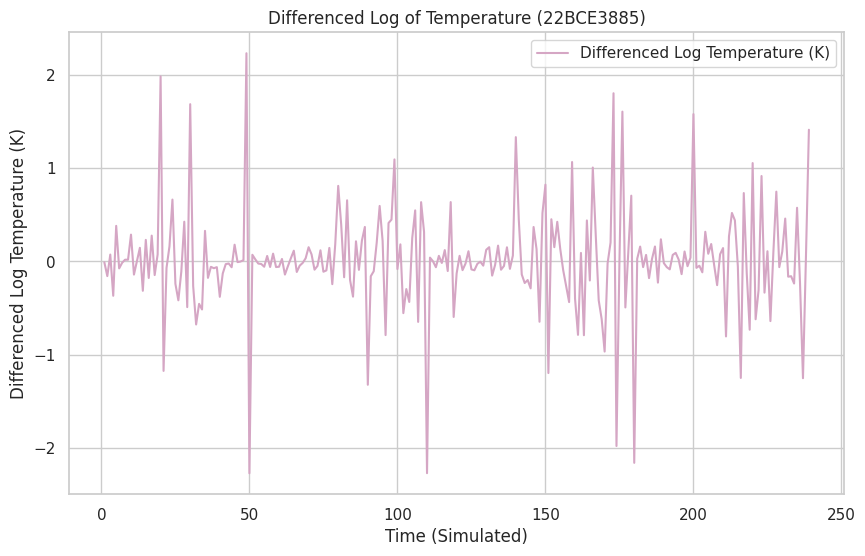

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Check if 'Temperature (K)' exists in the DataFrame
if 'Temperature (K)' in df.columns:
    # Log transformation
    df['log_temperature'] = np.log(df['Temperature (K)'])

    # Differencing to make it stationary
    df['diff_log_temperature'] = df['log_temperature'].diff()

    # Plotting the differenced series
    plt.figure(figsize=(10, 6))
    plt.plot(df['time'], df['diff_log_temperature'], label='Differenced Log Temperature (K)', color="#D5A6C4")
    plt.title("Differenced Log of Temperature (22BCE3885)")
    plt.xlabel("Time (Simulated)")
    plt.ylabel("Differenced Log Temperature (K)")
    plt.legend(loc='upper right')
    plt.show()
else:
    print("Column 'Temperature (K)' not found in the DataFrame.")



7.7 Plot Box Plot Across Categories

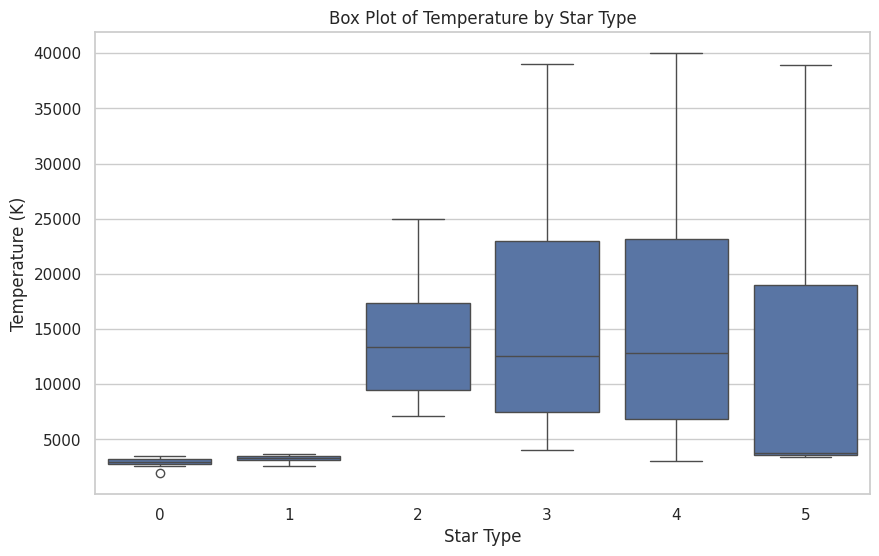

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot by Star Type category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star type', y='Temperature (K)', data=df)
plt.title("Box Plot of Temperature by Star Type")
plt.xlabel("Star Type")
plt.ylabel("Temperature (K)")
plt.show()


# Module 4

8.1D Statistical Data Analysis
**bold text**

**8.1 Measures of Central Tendency**

8.1.1 Mean and Median

In [ ]:
print(df.columns)


Index(['Star type', 'Radius(R/Ro)', 'Temperature (K)', 'Luminosity(L/Lo)',
       'Absolute magnitude(Mv)', 'Star color', 'Spectral Class',
       'radius_category', 'magnitude_category', 'log_Radius', 'radius_bin',
       'time', 'rolling_mean', 'log_temperature', 'diff_log_temperature'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np

# Convert columns to numeric, coercing errors to NaN
numeric_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Mean
mean_values = df[numeric_columns].mean()
print("Mean Values:\n", mean_values)

# Calculate Median
median_values = df[numeric_columns].median()
print("\nMedian Values:\n", median_values)

# Calculate Quantiles
quantiles = df[numeric_columns].quantile([0.25, 0.5, 0.75])
print("\nQuantiles (25%, 50%, 75%):\n", quantiles)


Mean Values:
 Temperature (K)            10497.462500
Luminosity(L/Lo)          106164.045156
Radius(R/Ro)                 237.157781
Absolute magnitude(Mv)         4.382396
dtype: float64

Median Values:
 Temperature (K)           5776.0000
Luminosity(L/Lo)             0.0560
Radius(R/Ro)                 0.7625
Absolute magnitude(Mv)       8.3130
dtype: float64

Quantiles (25%, 50%, 75%):
       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
0.25          3344.25           0.00086       0.10275                 -6.2325
0.50          5776.00           0.05600       0.76250                  8.3130
0.75         15055.50      198000.00000      42.75000                 13.6975


**8.2 Measures of Dispersion**

8.2.1 Range, IQR, and Standard Deviation

In [ ]:
import scipy.stats as stats

# Define the columns to analyze
columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Convert columns to numeric, handling errors
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')

#  Range
range_values = df[columns].max() - df[columns].min()
print("\nRange Values:\n", range_values)

#  Interquartile Range (IQR)
iqr_values = stats.iqr(df[columns], axis=0, nan_policy='omit')
print("\nInterquartile Range (IQR):\n", iqr_values)

#  Standard Deviation
std_dev = df[columns].std()
print("\nStandard Deviation:\n", std_dev)

#  Skewness
skewness = df[columns].skew()
print("\nSkewness:\n", skewness)

#  Kurtosis
kurtosis = df[columns].kurt()
print("\nKurtosis:\n", kurtosis)



Range Values:
 Temperature (K)            38061.00000
Luminosity(L/Lo)          849419.99992
Radius(R/Ro)                1948.49160
Absolute magnitude(Mv)        31.98000
dtype: float64

Interquartile Range (IQR):
 [1.17112500e+04 1.97999999e+05 4.26472500e+01 1.99300000e+01]

Standard Deviation:
 Temperature (K)             9552.425037
Luminosity(L/Lo)          179104.259253
Radius(R/Ro)                 517.155763
Absolute magnitude(Mv)        10.532512
dtype: float64

Skewness:
 Temperature (K)           1.321568
Luminosity(L/Lo)          2.094744
Radius(R/Ro)              1.946800
Absolute magnitude(Mv)   -0.121540
dtype: float64

Kurtosis:
 Temperature (K)           0.877352
Luminosity(L/Lo)          4.586096
Radius(R/Ro)              2.072935
Absolute magnitude(Mv)   -1.655888
dtype: float64


**8.3 Frequency Distribution**

8.3.1 Histogram

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Radius(R/Ro)'], bins=30, kde=True)
plt.title("Histogram of Radius (R/Ro)")
plt.xlabel("Radius (R/Ro)")
plt.ylabel("Frequency")
plt.show()


8.3.2 Relative Frequency Distribution

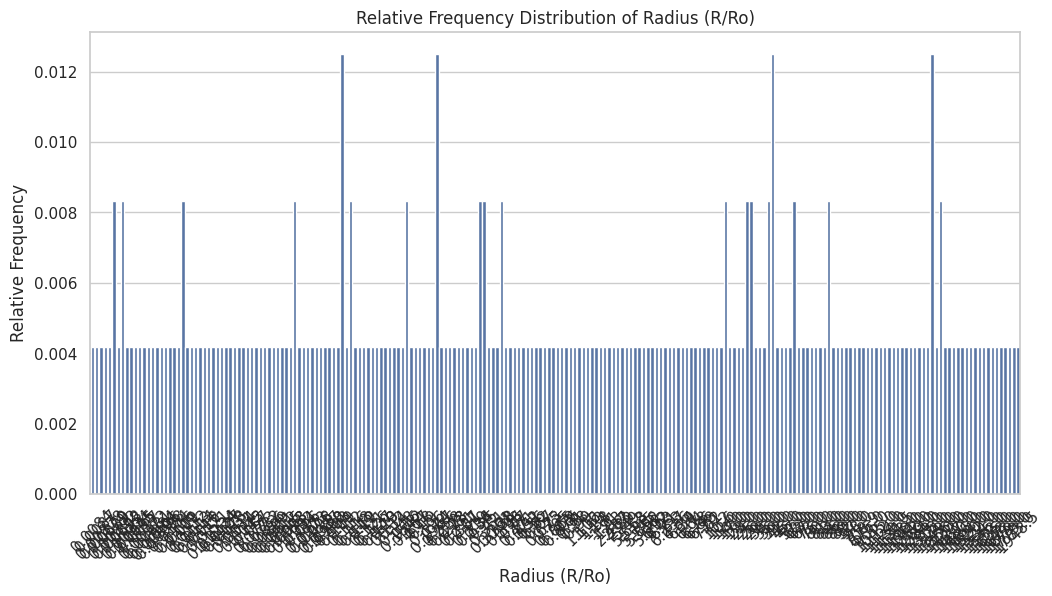

In [ ]:
# Relative frequency
rel_freq = df['Radius(R/Ro)'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=rel_freq.index, y=rel_freq.values)
plt.title("Relative Frequency Distribution of Radius (R/Ro)")
plt.xlabel("Radius (R/Ro)")
plt.ylabel("Relative Frequency")
plt.xticks(rotation=45)
plt.show()



8.3.3 Cumulative Frequency Distribution

In [ ]:
# Compute cumulative frequency
cumulative_freq = df['Radius(R/Ro)'].value_counts().sort_index().cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=cumulative_freq.index, y=cumulative_freq.values, marker="o")
plt.title("Cumulative Frequency Distribution of Radius (R/Ro)")
plt.xlabel("Radius (R/Ro)")
plt.ylabel("Cumulative Frequency")
plt.grid(True)
plt.show()


**8.4 Categorical Variable Analysis**

Assuming you want to analyze the smoothness_category:

8.4.1 Pie Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorizing Temperature (K) into Low, Medium, and High
df['temperature_category'] = pd.cut(df['Temperature (K)'],
                                    bins=[0, 3500, 6000, 40000],
                                    labels=['Low', 'Medium', 'High'])

# Verifying the creation of the new column
print(df[['Temperature (K)', 'temperature_category']].head())

def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute} ({pct:.1f}%)' if pct > 5 else ''

# Create a figure for the pie chart
plt.figure(figsize=(8, 8))

# Calculate sizes for each category
sizes = df['temperature_category'].value_counts()

# New custom color palette (Dark Blue, Purple, Orange)
colors = ['#1E3A8A', '#9333EA', '#F97316']

# Create the pie chart
plt.pie(sizes,
        autopct=lambda pct: func(pct, sizes),
        startangle=90,
        colors=colors,
        textprops={'fontsize': 14})

# Title and layout settings
plt.title("22BCE3885 - Pie Plot of Temperature Category", fontsize=16, fontweight='bold', color='black')
plt.axis('equal')

# Show the plot
plt.show()


   Temperature (K) temperature_category
0             3068                  Low
1             3042                  Low
2             2600                  Low
3             2800                  Low
4             1939                  Low


8.4.2 Stacked Bar Plot

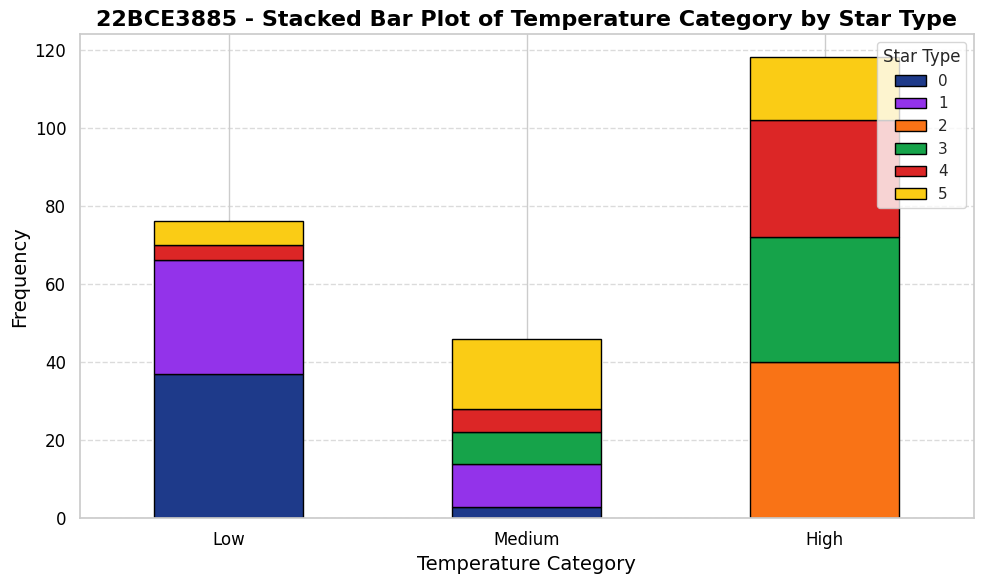

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a pivot table for Star Type by Temperature Category
pivot_table = df.groupby(['temperature_category', 'Star type'], observed=True).size().unstack()

plt.figure(figsize=(10, 6))


colors = ['#1E3A8A', '#9333EA', '#F97316', '#16A34A', '#DC2626', '#FACC15']

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=plt.gca())

# Titles and labels
plt.title("22BCE3885 - Stacked Bar Plot of Temperature Category by Star Type", fontsize=16, fontweight='bold', color='black')
plt.xlabel("Temperature Category", fontsize=14, color='black')
plt.ylabel("Frequency", fontsize=14, color='black')
plt.xticks(rotation=0, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.legend(title='Star Type', loc='upper right', frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()


# 9. Exploratory Data Analysis for Structured data - 2D Analysis

9.1 Create 2-Way Contingency Tables for Categorical-Categorical, Numerical-Numerical, and Categorical-Numerical Variables

In [ ]:
# Import necessary libraries
import pandas as pd

# Categorical-Categorical (e.g., 'Star type' and binned 'Temperature (K)')
categorical_categorical = pd.crosstab(df['Star type'], pd.cut(df['Temperature (K)'], bins=3))
print("Categorical-Categorical Contingency Table:\n", categorical_categorical)

# Numerical-Numerical (e.g., binned 'Radius(R/Ro)' vs binned 'Luminosity(L/Lo)')
numerical_numerical = pd.crosstab(pd.cut(df['Radius(R/Ro)'], bins=3), pd.cut(df['Luminosity(L/Lo)'], bins=3))
print("\nNumerical-Numerical Contingency Table:\n", numerical_numerical)

# Categorical-Numerical (e.g., 'Star type' and binned 'Radius(R/Ro)')
categorical_numerical = pd.crosstab(df['Star type'], pd.cut(df['Radius(R/Ro)'], bins=3))
print("\nCategorical-Numerical Contingency Table:\n", categorical_numerical)


Categorical-Categorical Contingency Table:
 Temperature (K)  (1900.939, 14626.0]  (14626.0, 27313.0]  (27313.0, 40000.0]
Star type                                                                   
0                                 40                   0                   0
1                                 40                   0                   0
2                                 24                  16                   0
3                                 23                   9                   8
4                                 22                  14                   4
5                                 29                   5                   6

Numerical-Numerical Contingency Table:
 Luminosity(L/Lo)     (-849.42, 283140.0]  (283140.0, 566280.0]  \
Radius(R/Ro)                                                     
(-1.94, 649.506]                     185                    10   
(649.506, 1299.003]                   11                     1   
(1299.003, 1948.5]                 

9.2 Create a 3-Way Contingency Table

In [ ]:
# Import necessary libraries
import pandas as pd

# 3-Way Contingency Table for 'Star type', binned 'Radius(R/Ro)', and binned 'Temperature (K)'
three_way_table = pd.crosstab([df['Star type'], pd.cut(df['Radius(R/Ro)'], bins=3)], pd.cut(df['Temperature (K)'], bins=3))

print("\n3-Way Contingency Table:\n", three_way_table)



3-Way Contingency Table:
 Temperature (K)                (1900.939, 14626.0]  (14626.0, 27313.0]  \
Star type Radius(R/Ro)                                                   
0         (-1.94, 649.506]                      40                   0   
1         (-1.94, 649.506]                      40                   0   
2         (-1.94, 649.506]                      24                  16   
3         (-1.94, 649.506]                      23                   9   
4         (-1.94, 649.506]                      22                  14   
5         (649.506, 1299.003]                   10                   3   
          (1299.003, 1948.5]                    19                   2   

Temperature (K)                (27313.0, 40000.0]  
Star type Radius(R/Ro)                             
0         (-1.94, 649.506]                      0  
1         (-1.94, 649.506]                      0  
2         (-1.94, 649.506]                      0  
3         (-1.94, 649.506]                    

9.3 Apply Row Profile, Column Profile, Relative Frequency, and Chi-Square Test

In [ ]:
import scipy.stats as stats

# Row profile (percentage of each row's total)
row_profile = three_way_table.div(three_way_table.sum(axis=1), axis=0)
print("\nRow Profile:\n", row_profile)

# Column profile (percentage of each column's total)
col_profile = three_way_table.div(three_way_table.sum(axis=0), axis=1)
print("\nColumn Profile:\n", col_profile)

# Relative frequency (each value divided by total sum)
relative_frequency = three_way_table / three_way_table.sum().sum()
print("\nRelative Frequency:\n", relative_frequency)

# Chi-square test to check for independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(three_way_table)
print(f"\nChi-Square Test:\nChi2 Statistic = {chi2_stat:.4f}, p-value = {p_val:.4f}")



Row Profile:
 Temperature (K)                (1900.939, 14626.0]  (14626.0, 27313.0]  \
Star type Radius(R/Ro)                                                   
0         (-1.94, 649.506]                1.000000               0.000   
1         (-1.94, 649.506]                1.000000               0.000   
2         (-1.94, 649.506]                0.600000               0.400   
3         (-1.94, 649.506]                0.575000               0.225   
4         (-1.94, 649.506]                0.550000               0.350   
5         (649.506, 1299.003]             0.666667               0.200   
          (1299.003, 1948.5]              0.760000               0.080   

Temperature (K)                (27313.0, 40000.0]  
Star type Radius(R/Ro)                             
0         (-1.94, 649.506]               0.000000  
1         (-1.94, 649.506]               0.000000  
2         (-1.94, 649.506]               0.000000  
3         (-1.94, 649.506]               0.200000  
4     

9.4 Display Scatter Plot for 2 Variables

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for 'Radius(R/Ro)' vs 'Temperature (K)'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Radius(R/Ro)', y='Temperature (K)', hue='Star type', palette='coolwarm')


plt.title("Scatter Plot of Star Radius vs Temperature")
plt.xlabel("Radius (R/Ro)")
plt.ylabel("Temperature (K)")
plt.legend(title="Star Type")
plt.show()


9.5 3D Scatter Plot

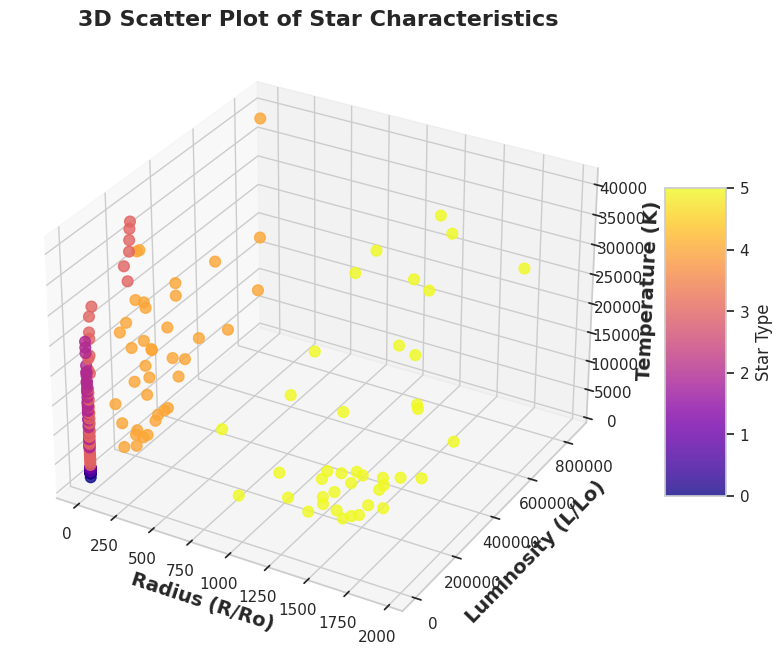

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ensure 'Star type' is a categorical type
df['Star type'] = df['Star type'].astype('category')

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with improved color mapping
scatter = ax.scatter(
    df['Radius(R/Ro)'],
    df['Luminosity(L/Lo)'],
    df['Temperature (K)'],
    c=df['Star type'].cat.codes,
    s=60,
    alpha=0.8,
    cmap='plasma'
)

# Set labels
ax.set_xlabel('Radius (R/Ro)', fontsize=14, fontweight='bold')
ax.set_ylabel('Luminosity (L/Lo)', fontsize=14, fontweight='bold')
ax.set_zlabel('Temperature (K)', fontsize=14, fontweight='bold')
ax.set_title('3D Scatter Plot of Star Characteristics', fontsize=16, fontweight='bold')

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Star Type', fontsize=12)

plt.show()



9.6 2D Box Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Star type', y='Radius(R/Ro)', data=df, palette="coolwarm")

plt.title("Box Plot of Radius by Star Type (22BCE3885)", fontsize=16, fontweight='bold')
plt.xlabel("Star Type", fontsize=14, fontweight='bold')
plt.ylabel("Radius (R/Ro)", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.show()


9.7 Customize the 3D Scatter Plot (Color, Shape, Bars)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Create contingency table
contingency_table = pd.crosstab(df['Spectral Class'], df['Star type'])

# Create the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare the data
x_labels = contingency_table.index
y_labels = contingency_table.columns

x_pos = np.arange(len(x_labels))
y_pos = np.arange(len(y_labels))

# Create meshgrid for positioning
x_pos_mesh, y_pos_mesh = np.meshgrid(x_pos, y_pos, indexing='ij')
x_pos_flat = x_pos_mesh.flatten()
y_pos_flat = y_pos_mesh.flatten()
z_pos = np.zeros_like(x_pos_flat)

# Bar heights (flattened)
dz = contingency_table.values.flatten()

# Bar dimensions
dx = dy = 0.4  # Bar width and depth


colors = ['#253494', '#2C7FB8', '#41B6C4', '#A1DAB4', '#FFFFCC']
bar_colors = [colors[i % len(colors)] for i in range(len(dz))]

# Create bars
ax.bar3d(x_pos_flat, y_pos_flat, z_pos, dx, dy, dz, color=bar_colors, edgecolor='black', alpha=0.9)

# Set axis labels and title
ax.set_xlabel('Spectral Class', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Star Type', fontsize=14, fontweight='bold', labelpad=10)
ax.set_zlabel('Frequency', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('3D Bar Plot of Spectral Class vs Star Type (22BCE3885)', fontsize=16, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=12)
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels, rotation=45, ha='right', fontsize=12)
ax.view_init(elev=20, azim=-45)

plt.show()



9.8 Create a Sunray Plot (Radar Chart)

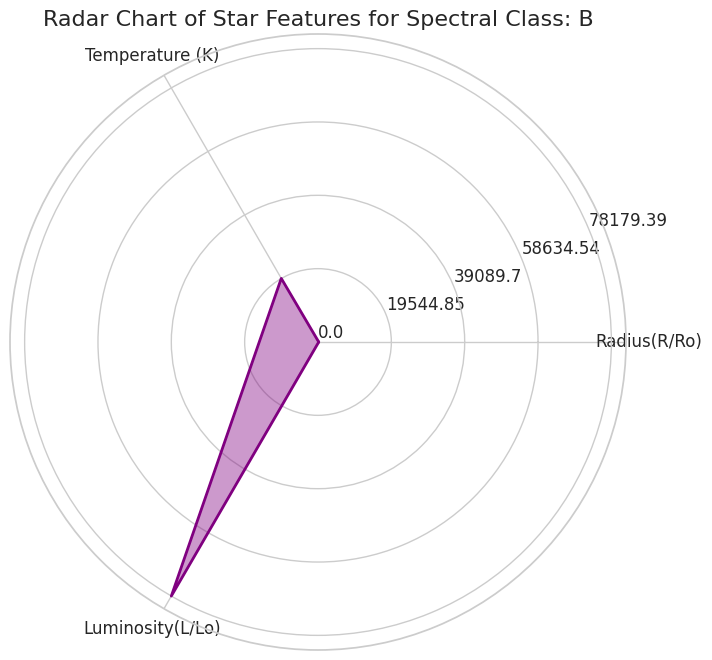

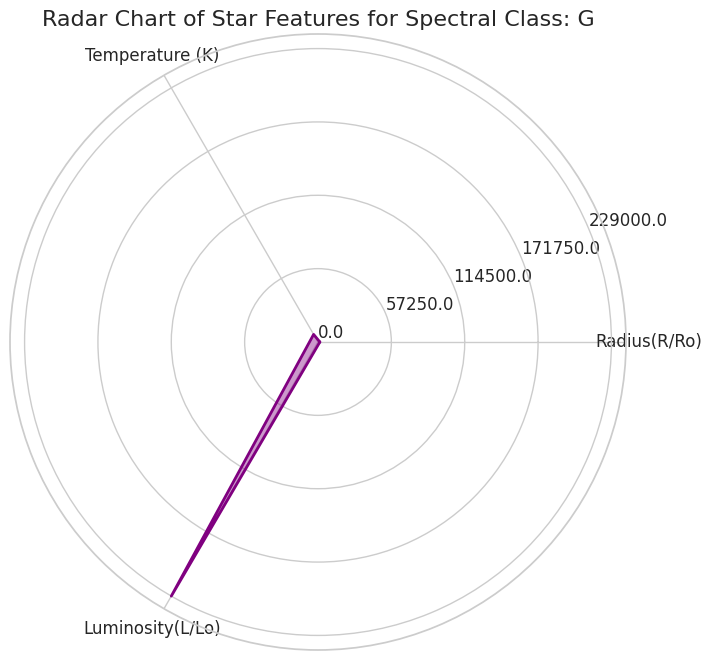

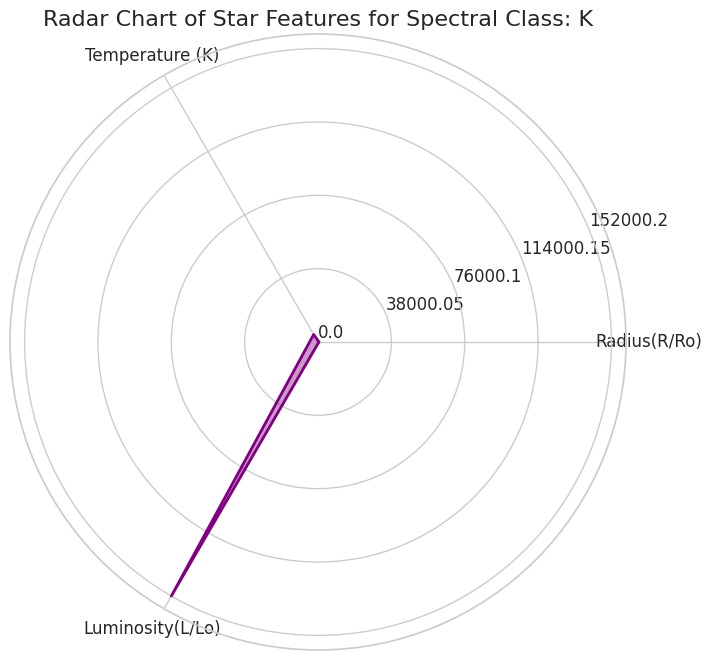

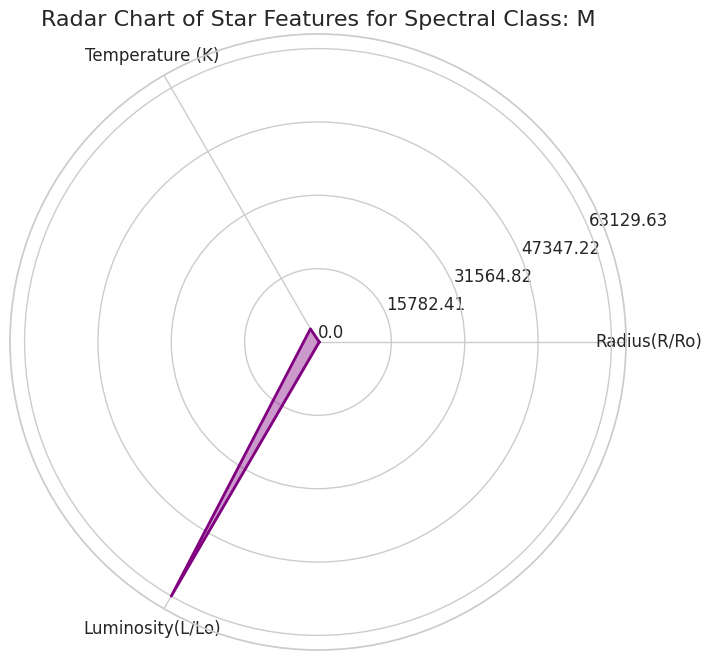

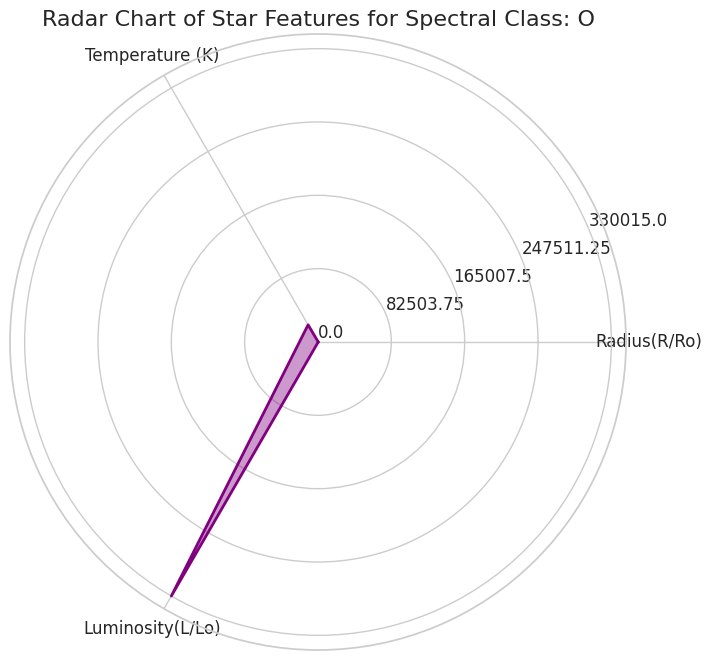

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create radar chart
def create_radar_chart(data, labels, title):
    num_vars = len(labels)  # Number of variables
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Completing the loop for a circular plot
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    # Create figure
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Radar chart properties
    ax.fill(angles, data, color='purple', alpha=0.4)
    ax.plot(angles, data, color='purple', linewidth=2)

    # Radial grid customization
    ax.set_yticks(np.linspace(0, max(data), 5))
    ax.set_yticklabels([f"{round(i, 2)}" for i in np.linspace(0, max(data), 5)], fontsize=12)

    # Setting labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    plt.title(title, size=16)

    plt.show()

# Selecting relevant columns from your dataset
features = ['Radius(R/Ro)', 'Temperature (K)', 'Luminosity(L/Lo)']

# Compute mean values based on 'Spectral Class'
mean_values = df.groupby('Spectral Class')[features].mean()

# Create radar chart for each Spectral Class
for spectral_class in mean_values.index:
    create_radar_chart(mean_values.loc[spectral_class].values, features, f'Radar Chart of Star Features for Spectral Class: {spectral_class}')



# Module 5


**10. K-Means Clustering**

10.1 Importing Libraries

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



10.2 Using the Elbow Method to Find the Optimal Number of Clusters

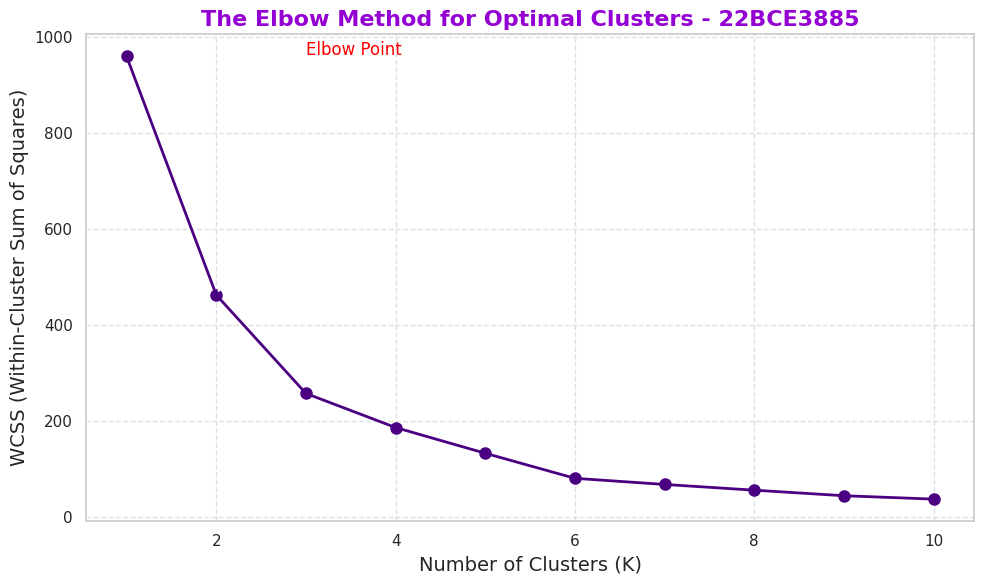

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv'
df = pd.read_csv(url)

# Select only numeric features for clustering
X = df.select_dtypes(include=[np.number])

# Handle missing values (if any) by filling with column mean
X.fillna(X.mean(), inplace=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


diffs = np.diff(wcss, 2)
elbow_k = np.argmax(diffs) + 2


plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', color='indigo', linestyle='-', linewidth=2, markersize=8)
plt.title('The Elbow Method for Optimal Clusters - 22BCE3885', fontsize=16, fontweight='bold', color='darkviolet')
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)


plt.annotate('Elbow Point', xy=(elbow_k, wcss[elbow_k - 1]), xytext=(elbow_k + 1, wcss[elbow_k - 1] + 500),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, color='red')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()



10.3 Fit K-Means Clustering



Silhouette Score: 0.5567


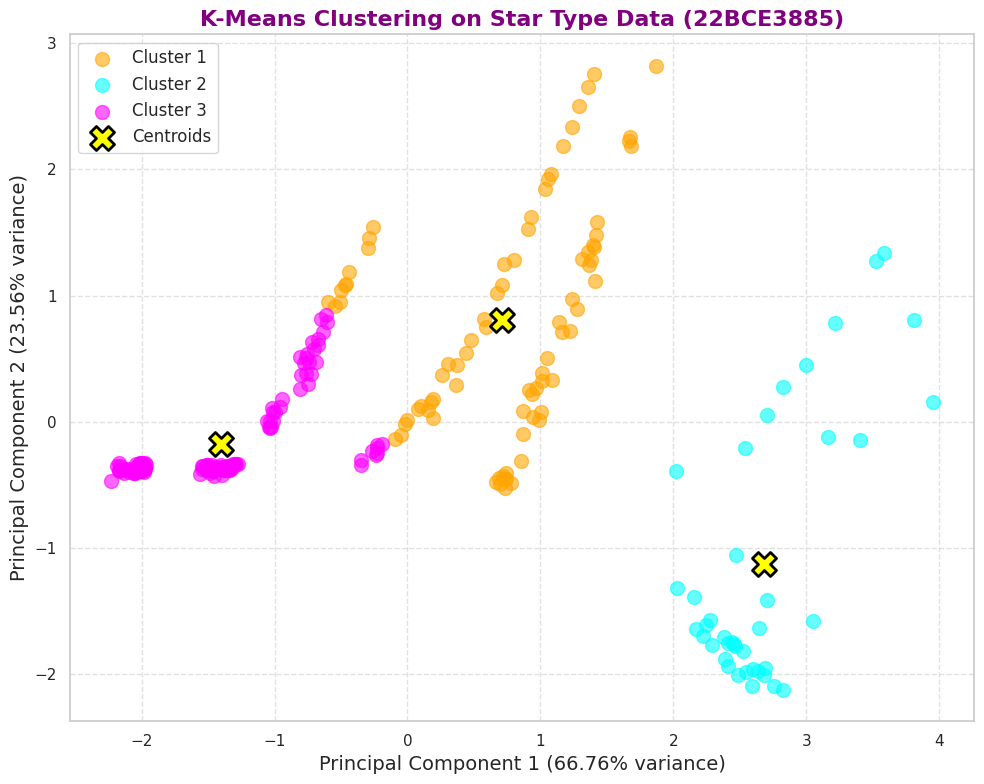

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv'
df = pd.read_csv(url)


X = df.select_dtypes(include=[np.number])


X.fillna(X.mean(), inplace=True)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

# Calculate the Silhouette Score
sil_score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score: {sil_score:.4f}")


plt.figure(figsize=(10, 8))

colors = ['orange', 'cyan', 'magenta']
for i in range(3):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X', edgecolors='black', linewidths=2)

# Title and labels
plt.title('K-Means Clustering on Star Type Data (22BCE3885)', fontsize=16, fontweight='bold', color='purple')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0] * 100:.2f}% variance)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1] * 100:.2f}% variance)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()



10.4 Calculate Different Distances


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import cdist


dataset = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv')


dataset.replace('?', np.nan, inplace=True)


dataset = dataset.apply(pd.to_numeric, errors='ignore')


dataset.dropna(inplace=True)


categorical_columns = ['Star color', 'Spectral Class']


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le


X = dataset.drop(['Star type'], axis=1)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

euclidean_distances = cdist(X_pca, kmeans.cluster_centers_, 'euclidean')


manhattan_distances = cdist(X_pca, kmeans.cluster_centers_, 'cityblock')


cosine_distances = cdist(X_pca, kmeans.cluster_centers_, 'cosine')

print('Euclidean Distances (first 5 points):\n', euclidean_distances[:5])
print('Manhattan Distances (first 5 points):\n', manhattan_distances[:5])
print('Cosine Distances (first 5 points):\n', cosine_distances[:5])


Euclidean Distances (first 5 points):
 [[0.17271005 2.83882151 3.57662213]
 [0.19413674 2.8502882  3.6020998 ]
 [0.31225066 2.92557329 3.72540907]
 [0.21030264 2.86828406 3.6134123 ]
 [0.40909693 3.00221727 3.81888232]]
Manhattan Distances (first 5 points):
 [[0.22481534 4.0000221  3.93875788]
 [0.24362652 4.01883328 3.9698693 ]
 [0.35824923 4.13345599 4.10146527]
 [0.26914915 4.04435591 3.96982532]
 [0.46938631 4.24459307 4.18150871]]
Cosine Distances (first 5 points):
 [[6.45772464e-05 1.43377769e+00 1.77336445e+00]
 [5.93451430e-06 1.42662851e+00 1.77836083e+00]
 [2.11962372e-04 1.40476953e+00 1.79322411e+00]
 [3.81084211e-05 1.43140252e+00 1.77503189e+00]
 [3.26590388e-04 1.40022145e+00 1.79623966e+00]]


11. Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the star type dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"
df = pd.read_csv(url)

# Trim spaces from column names to avoid KeyErrors
df.columns = df.columns.str.strip()

# Select relevant numerical features for clustering
dataset = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]

# Display the first few rows to confirm data selection
print(dataset.head())


   Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
0             3068           0.0024        0.1700                   16.12
1             3042           0.0005        0.1542                   16.60
2             2600           0.0003        0.1020                   18.70
3             2800           0.0002        0.1600                   16.65
4             1939         0.000138        0.1030                   20.06



11.2 Statistical Summary

In [ ]:
# 1. Statistical summary of the selected features
print("Statistical Summary:")
print(dataset.describe())


Statistical Summary:
       Temperature (K)  Radius(R/Ro)  Absolute magnitude(Mv)
count       240.000000    240.000000              240.000000
mean      10497.462500    237.157781                4.382396
std        9552.425037    517.155763               10.532512
min        1939.000000      0.008400              -11.920000
25%        3344.250000      0.102750               -6.232500
50%        5776.000000      0.762500                8.313000
75%       15055.500000     42.750000               13.697500
max       40000.000000   1948.500000               20.060000


11.3 Euclidean Distance Matrix and Dendrogram

Sample of Euclidean Distance Matrix:
 [  26.00443526  468.00711643  268.00052426 1129.0068769   228.00162983
  431.00140586  468.00175628  418.00212021  368.00000884  532.02781929]


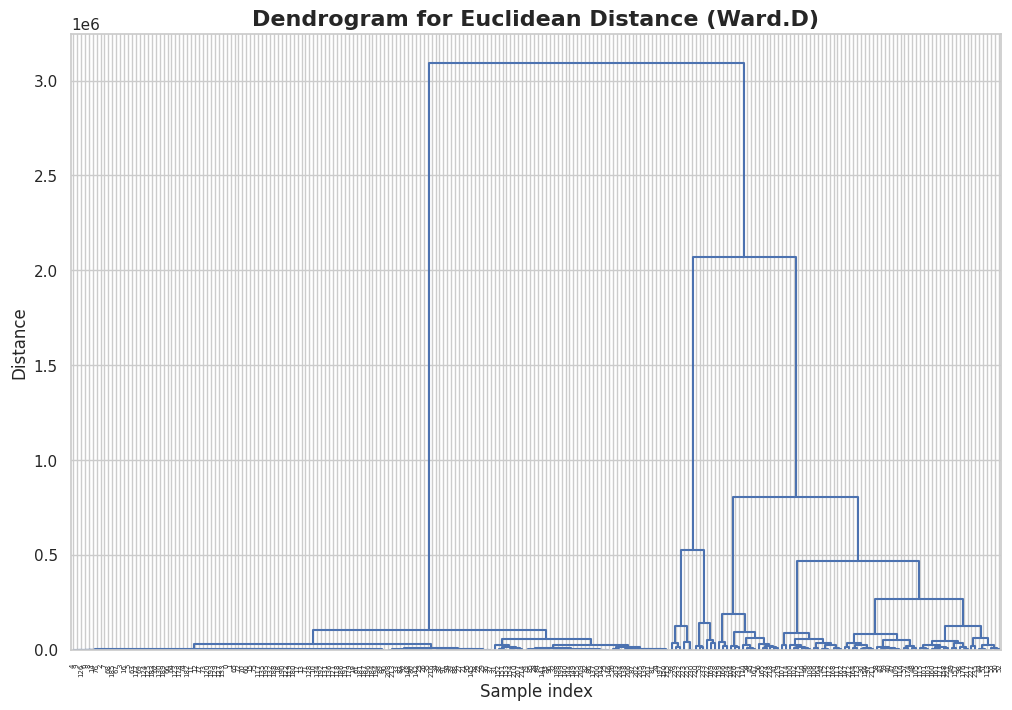

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"
df = pd.read_csv(url)

# Trim spaces in column names
df.columns = df.columns.str.strip()

# Select only numerical features
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Convert to numeric (force non-numeric values to NaN)
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df = df.dropna()
dataset = df[features]

# Compute Euclidean distance
euclidean_distances = pdist(dataset, metric='euclidean')
print("Sample of Euclidean Distance Matrix:\n", euclidean_distances[:10])

# Generate linkage matrix and dendrogram
linked = linkage(euclidean_distances, method='ward')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Euclidean Distance (Ward.D)', fontsize=16, fontweight='bold')
plt.xlabel('Sample index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

dendrogram(linked, color_threshold=0)
plt.gcf().set_facecolor('white')
plt.show()


11.4 Manhattan Distance Matrix and Dendrogram

Sample of Manhattan Distance Matrix:
 [  26.4977    470.6501    268.5422   1133.009262  228.92175   432.14467
  469.356     419.39171   368.11222   537.7705  ]


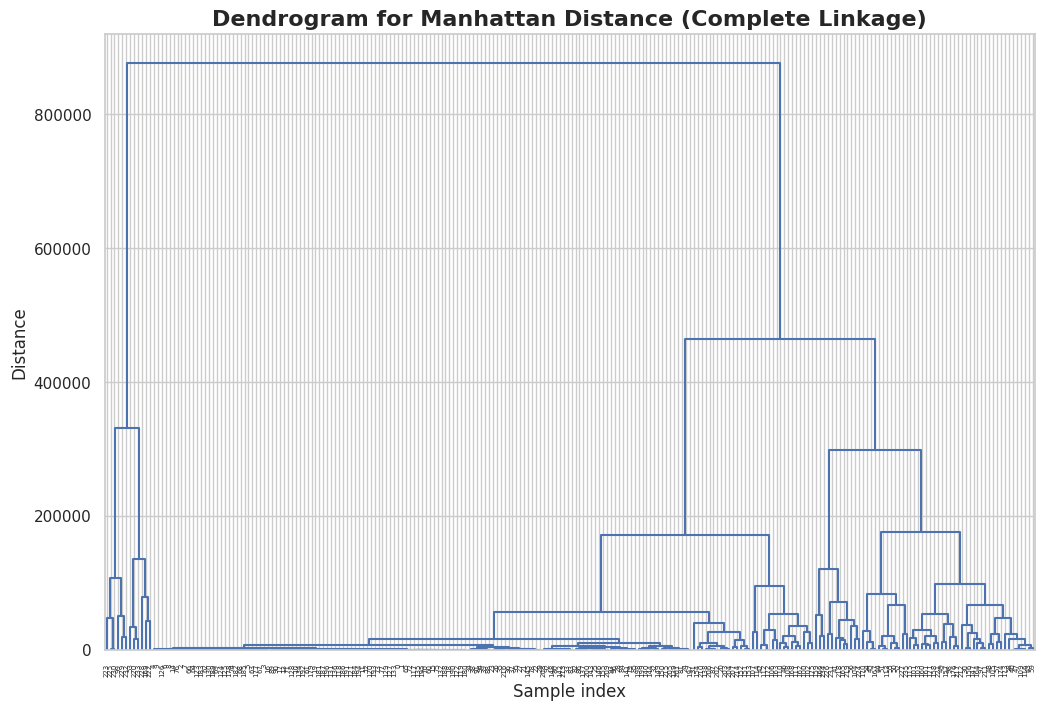

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"
df = pd.read_csv(url)
df.columns = df.columns.str.strip()


features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Convert to numeric (force non-numeric values to NaN)
df[features] = df[features].apply(pd.to_numeric, errors='coerce')


df = df.dropna()

t
dataset = df[features]

# Compute the Manhattan distance matrix (optional, but not needed for linkage)
manhattan_distances = pdist(dataset, metric='cityblock')
print("Sample of Manhattan Distance Matrix:\n", manhattan_distances[:10])


linked_manhattan = linkage(dataset, method='complete', metric='cityblock')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Manhattan Distance (Complete Linkage)', fontsize=16, fontweight='bold')
plt.xlabel('Sample index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Generate and customize the dendrogram
dendrogram(linked_manhattan, color_threshold=0)

plt.gcf().set_facecolor('white')

# Show the plot
plt.show()


11.5 Maximum Distance Matrix and Dendrogram

Sample of Maximum Distance Matrix (Chebyshev):
 [  26.  468.  268. 1129.  228.  431.  468.  418.  368.  532.]


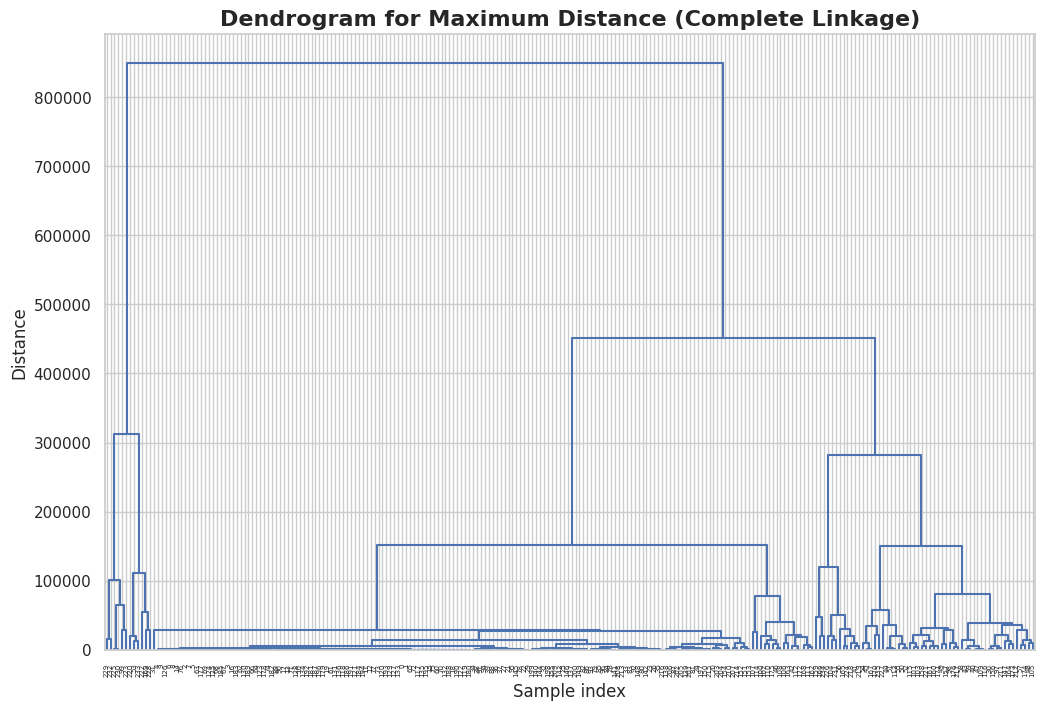

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip()


features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Convert to numeric (force non-numeric values to NaN)
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

df = df.dropna()

# Now assign cleaned dataset
dataset = df[features]

# Compute the Maximum (Chebyshev) distance matrix
maximum_distances = pdist(dataset, metric='chebyshev')
print("Sample of Maximum Distance Matrix (Chebyshev):\n", maximum_distances[:10])


linked_maximum = linkage(dataset, method='complete', metric='chebyshev')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Maximum Distance (Complete Linkage)', fontsize=16, fontweight='bold')
plt.xlabel('Sample index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Generate the dendrogram
dendrogram(linked_maximum, color_threshold=0)

plt.gcf().set_facecolor('white')

# Show the plot
plt.show()



11.6 Canberra Distance Matrix and Dendrogram

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip()

features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Convert to numeric (force non-numeric values to NaN)
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

df = df.dropna()

# Now assign cleaned dataset
dataset = df[features]

# Compute the Canberra distance matrix
canberra_distances = pdist(dataset, metric='canberra')
print("Sample of Canberra Distance Matrix:\n", canberra_distances[:10])


linked_canberra = linkage(dataset, method='complete', metric='canberra')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Canberra Distance (Complete Linkage)', fontsize=16, fontweight='bold')
plt.xlabel('Sample index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Generate the dendrogram
dendrogram(linked_canberra, color_threshold=0)

plt.gcf().set_facecolor('white')

# Show the plot
plt.show()


Sample of Canberra Distance Matrix:
 [0.72283301 1.18444193 0.93830164 1.47105847 0.85262982 0.78686864
 1.11323617 0.88040496 1.05977467 0.87666003]


11.7 Minkowski Distance Matrix and Dendrogram

Sample of Minkowski Distance Matrix (p=3):
 [  26.00005453  468.00002614  268.00000069 1129.00001599  228.00000408
  431.00000239  468.00000319  418.00000449  368.          532.00018861]


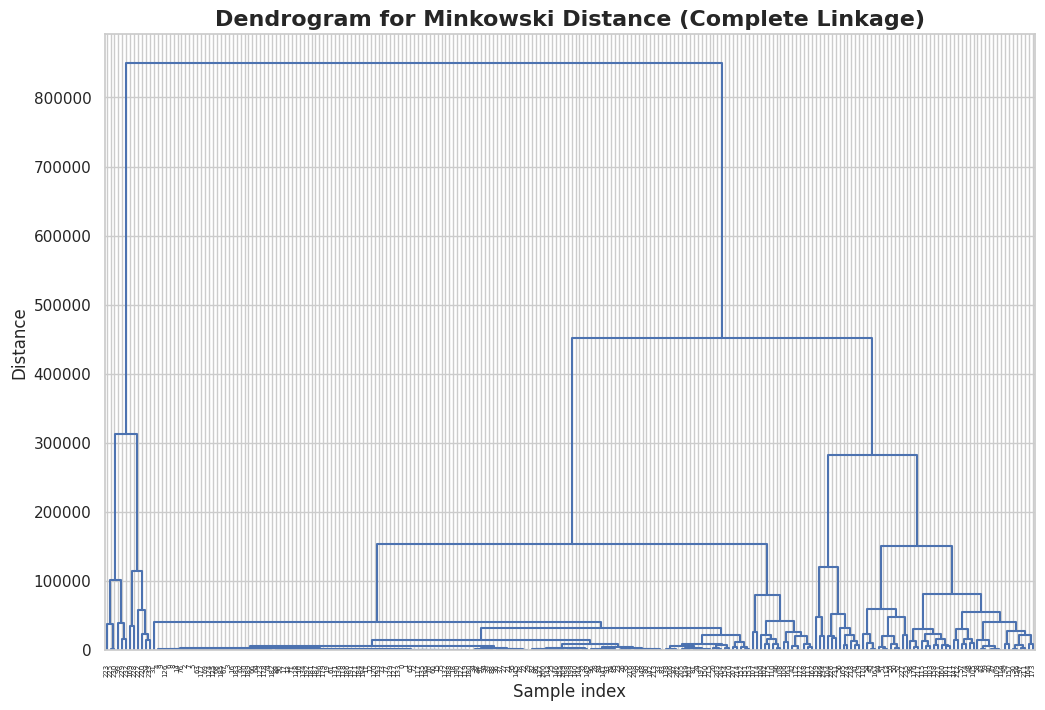

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip()

# Select only numerical features
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Convert to numeric (force non-numeric values to NaN)
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

df = df.dropna()

# Now assign cleaned dataset
dataset = df[features]

# Compute the Minkowski distance matrix (p=3)
minkowski_distances = pdist(dataset, metric='minkowski', p=3)
print("Sample of Minkowski Distance Matrix (p=3):\n", minkowski_distances[:10])


linked_minkowski = linkage(dataset, method='complete', metric='minkowski')

plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Minkowski Distance (Complete Linkage)', fontsize=16, fontweight='bold')
plt.xlabel('Sample index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

# Generate the dendrogram
dendrogram(linked_minkowski, color_threshold=0)

plt.gcf().set_facecolor('white')

# Show the plot
plt.show()



# Module 6

**Principle Compenent Analysis**

Step 1: Install and load necessary libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Step 2: Load the Dataset

In [ ]:
# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv'
df = pd.read_csv(url)

df.head()

Temperature (K) Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068           0.0024        0.1700                   16.12   
1             3042           0.0005        0.1542                   16.60   
2             2600           0.0003        0.1020                   18.70   
3             2800           0.0002        0.1600                   16.65   
4             1939         0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M

Step 3: Perform PCA on Numeric Columns

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])

# Standardizing the data (PCA works better with standardized data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio (Eigenvalues)
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained Variance Ratio (Eigenvalues):\n", explained_variance_ratio)

# Component loadings (coefficients of the components)
component_loadings = pca.components_
print("\nComponent Loadings (coefficients):\n", component_loadings)


Explained Variance Ratio (Eigenvalues):
 [0.66756742 0.23562002 0.08629109 0.01052147]

Component Loadings (coefficients):
 [[ 0.3105362   0.459379   -0.58440186  0.59246322]
 [ 0.8491132  -0.52684639 -0.00138031 -0.03791774]
 [ 0.4271278   0.71136784  0.44612337 -0.33539764]
 [-0.01165747 -0.07320931  0.67782483  0.73147659]]


Step 4: Print PCA Results (Eigenvalues and Component Loadings)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"
df = pd.read_csv(url)

# Print column names to check for inconsistencies
print("Column Names:", df.columns.tolist())
df.columns = df.columns.str.strip()

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Standardize the data (PCA works best with standardized data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Eigenvalues (explained variance ratio)
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio (Eigenvalues):\n", explained_variance_ratio)

# Component loadings (coefficients of the components)
component_loadings = pca.components_
print("\nComponent Loadings (coefficients):\n", component_loadings)


Column Names: ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']
Explained Variance Ratio (Eigenvalues):
 [0.66756742 0.23562002 0.08629109 0.01052147]

Component Loadings (coefficients):
 [[ 0.3105362   0.459379   -0.58440186  0.59246322]
 [ 0.8491132  -0.52684639 -0.00138031 -0.03791774]
 [ 0.4271278   0.71136784  0.44612337 -0.33539764]
 [-0.01165747 -0.07320931  0.67782483  0.73147659]]


Step 5: Visualize PCA Components Using plot() and biplot()

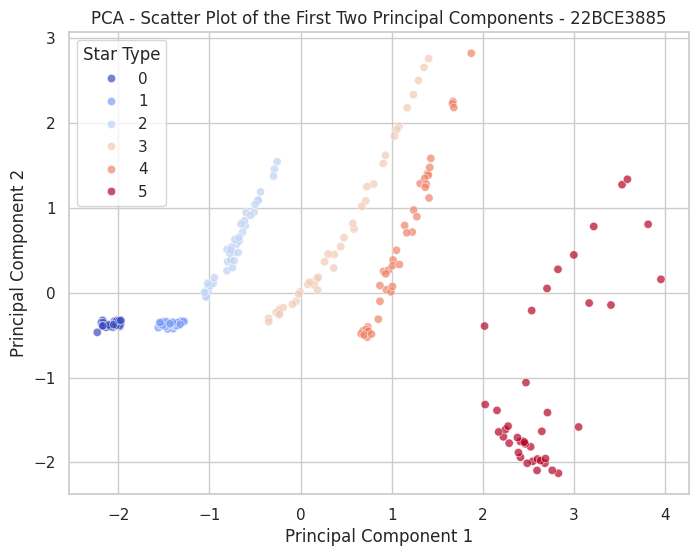

In [ ]:
# Select only numerical columns for PCA
df_numeric = df.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components=2)  # First two principal components
pc_df = pd.DataFrame(pca.fit_transform(data_scaled), columns=["PC1", "PC2"])


pc_df["Star type"] = df["Star type"]

# Create a scatter plot
plt.figure(figsize=(8, 6))

sns.scatterplot(x=pc_df["PC1"], y=pc_df["PC2"], hue=pc_df["Star type"], palette="coolwarm", alpha=0.7)

# Add titles and labels
plt.title("PCA - Scatter Plot of the First Two Principal Components - 22BCE3885")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Star Type", loc="best")

# Show the plot
plt.show()

In [ ]:
def biplot(score, coeff, labels=None, scale=1):
    xs = score[:, 0]
    ys = score[:, 1]


    plt.figure(figsize=(10, 8))


    plt.scatter(xs, ys, alpha=0.7, c=xs, cmap="coolwarm")

    # Add arrows for principal component directions
    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i, 0] * scale, coeff[i, 1] * scale, color="r", alpha=0.7)

        # Add labels for variables
        label = labels[i] if labels is not None else f"Var{i+1}"
        plt.text(coeff[i, 0] * scale, coeff[i, 1] * scale, label, color="g")


    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.title("PCA Biplot - First Two Principal Components - 22BCE3885")

    plt.show()


biplot(pc_df[['PC1', 'PC2']].values, np.transpose(pca.components_), labels=df_numeric.columns)


Step 6: Create a Scree Plot to Determine the Optimal Number of Principal Components

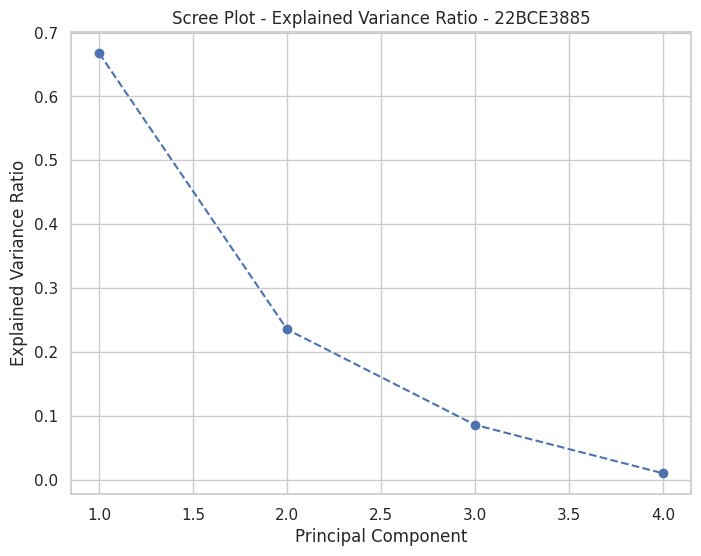

In [ ]:
# Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot - Explained Variance Ratio - 22BCE3885')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

Step 7: Select the Desired Number of Components (n_comp)

In [ ]:
n_comp = min(4, data_scaled.shape[1])
pca = PCA(n_components=n_comp)
data_pca = pca.fit_transform(data_scaled)

# Display the explained variance ratio of the selected components
print(f"Explained variance ratio for the first {n_comp} components (22BCE3885):")
print(pca.explained_variance_ratio_)


Explained variance ratio for the first 4 components (22BCE3885):
[0.66756742 0.23562002 0.08629109 0.01052147]


Step 8: Perform PCA with the Selected Components

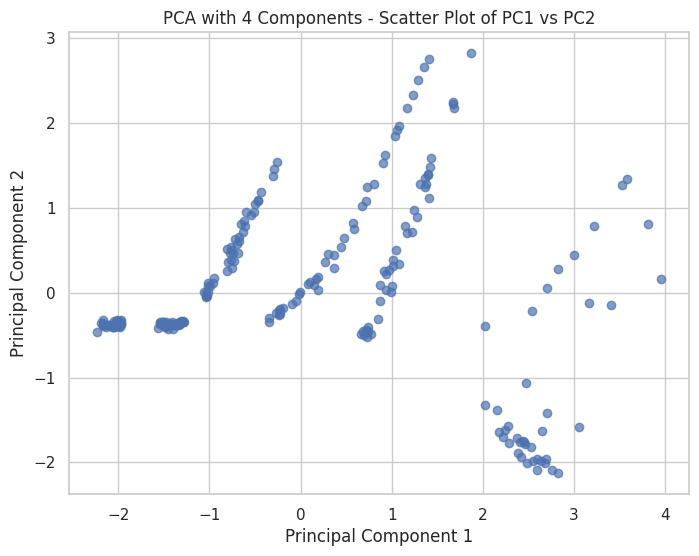

In [ ]:

pca = PCA(n_components=n_comp)
data_pca = pca.fit_transform(data_scaled)

# Visualize the transformed data (First two components)
pc_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(n_comp)])
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7, color='b')
plt.title(f'PCA with {n_comp} Components - Scatter Plot of PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Step 9: Plot the Selected PCA Components

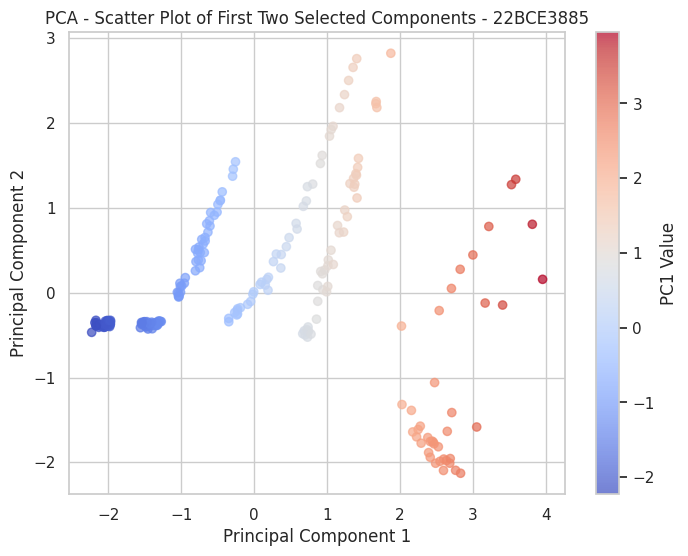

In [ ]:

# Plot the first two selected principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7, c=pc_df['PC1'], cmap='coolwarm')
plt.colorbar(label='PC1 Value')
plt.title('PCA - Scatter Plot of First Two Selected Components - 22BCE3885')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Show the plot
plt.show()

Step 10: Interpret the Results Using summary()

Explained Variance Ratio: [0.66756742 0.23562002 0.08629109 0.01052147]
Cumulative Explained Variance: [0.66756742 0.90318744 0.98947853 1.        ]


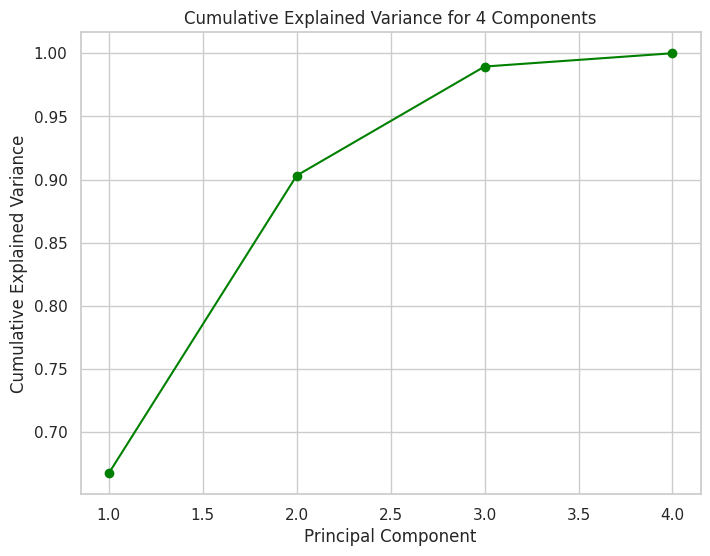

In [ ]:

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='green')
plt.title(f'Cumulative Explained Variance for {n_comp} Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# Module 7

Step 1: Load Dataset

In [ ]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"
df = pd.read_csv(url)

Step 2: Data Cleaning and Preprocessing

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

Step 3: Identify Relationships Between Features

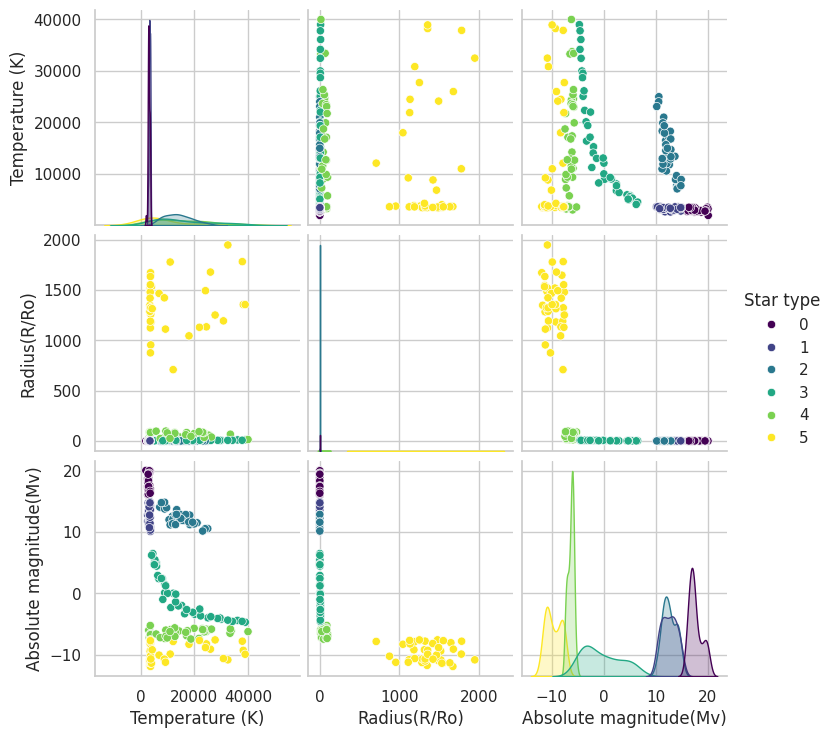

In [ ]:
numeric_cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']

sns.pairplot(df[numeric_cols], hue='Star type', palette="viridis")
plt.show()

Step 4: Split the Dataset into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Radius(R/Ro)']]
y = df['Luminosity(L/Lo)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


**Step 5: Simple Linear Regression**


Step 5: Simple Linear Regression
5.1 Fit the Model:

In [ ]:

from sklearn.linear_model import LinearRegression

# Fit the model
reg1 = LinearRegression()
reg1.fit(X_train, y_train)


LinearRegression()


5.2 Check Residuals:

In [ ]:

print(f"Coefficient: {reg1.coef_[0]}")
print(f"Intercept: {reg1.intercept_}")


Coefficient: 197.8565506526017
Intercept: 59286.87896955565


5.3 Predict Test Results:

In [ ]:
y_pred = reg1.predict(X_test)

5.4 Visualize Results:

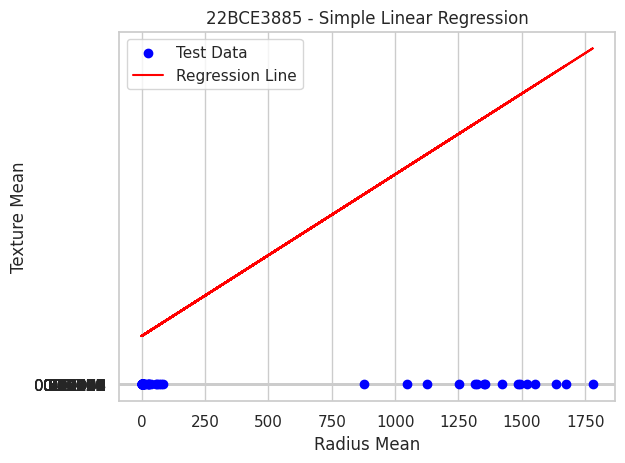

In [ ]:

plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("22BCE3885 - Simple Linear Regression")
plt.legend()
plt.show()

# **Step 6: Multiple Linear Regression with Log Transformation**

6.1 Fit Model:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/stars%20type.csv"
df = pd.read_csv(url)


df['Luminosity(L/Lo)'] = pd.to_numeric(df['Luminosity(L/Lo)'], errors='coerce')
df = df.dropna(subset=['Luminosity(L/Lo)'])
df['log_luminosity'] = np.log(df['Luminosity(L/Lo)'])
df['log_luminosity'] = np.log(df['Luminosity(L/Lo)'])


X_multi = df[['Radius(R/Ro)', 'Temperature (K)', 'log_luminosity']]
y_multi = df['Absolute magnitude(Mv)']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=1/3, random_state=42)


reg2 = LinearRegression()
reg2.fit(X_train_multi, y_train_multi)

y_pred_multi = reg2.predict(X_test_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)


print("R² Score:", r2_multi)
print("Coefficients:", reg2.coef_)
print("Intercept:", reg2.intercept_)


R² Score: 0.9564584723176276
Coefficients: [-1.76675863e-03 -7.71822588e-06 -1.05031426e+00]
Intercept: 6.583230068956093



6.2 Residuals and Prediction:

In [ ]:

y_pred_multi = reg2.predict(X_test_multi)


residuals = y_test_multi - y_pred_multi
print("Residuals:\n", residuals)

Residuals:
 24     0.872834
6      3.071488
93    -2.844641
110   -2.886991
104   -0.175167
         ...   
82    -0.598595
5      2.711113
56    -2.072905
169    1.152238
145   -0.236665
Name: Absolute magnitude(Mv), Length: 80, dtype: float64


6.3 Create DataFrame for Predicted and Residuals:

In [ ]:
pred_residuals = pd.DataFrame({
    'Predicted': y_pred_multi,
    'Residuals': residuals
})
print(pred_residuals.head())

     Predicted  Residuals
24   11.017166   0.872834
6    14.148512   3.071488
93    7.624641  -2.844641
110  -7.813009  -2.886991
104  -5.734833  -0.175167



# Step 7: Visualize with ggplot or qqPlot

7.1 Visualize Residuals vs. Predictions:

In [ ]:
sns.scatterplot(x=pred_residuals['Predicted'], y=pred_residuals['Residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("22BCE3885 - Residuals vs Predictions")
plt.show()


7.2 QQ Plot:

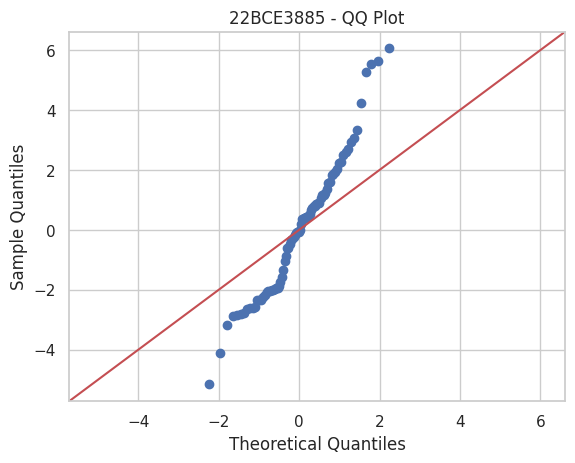

In [ ]:
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title("22BCE3885 - QQ Plot")
plt.show()